# ML for Retail: Predicting Customer Spend and Product Sales

# Abstract 

Is it possible to accurately predict product sales? What about customer spend? If it's possible, can our marketing and supply chain teams use these predictions to become more efficient? 

For this report, we used Ridge, Random Forest and Gradient Boosting Regression models to help predict customer spend and product sales. For product sales, Gradient Boosting was the most accurate model, scoring 92%. For customer spend, Ridge Regression model was the most accurate, scoring 97%. Both models helped us gain insights into how customer demographics and product meta-data can affect customer spend and product sales. The information gathered through data exploration and our machine learning models can help our Marketing team increase marketing ROI, and it can help our supply chain team decrease product overstock. This will lead to a decrease in expenses and an increase in company revenue. 

[Google Slide Presentation](https://docs.google.com/presentation/d/1gH4dUOnS-O-2uzHq-td4eQMJffZczkibpFflXOR4jYs/edit?usp=sharing)

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set_palette('muted')
import scipy as sp 
from scipy import stats


# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Introduction

Black Friday is one of the best days of the year - in one day, we can make 5.5 billion pesos in sales. However, what if we could decrease our expenses for Black Friday in order to increase the bottom line? Specifically, what if we could decrease are marketing spend while increasing our ROI? What if we could predict the demand for products via their sales? There are plenty of variables at our disposable that we can use to predict sales, such as customer demographics and product meta data. Let's see how we can use the information given to help decrease expenses. 

The [dataset](https://www.kaggle.com/mehdidag/black-friday) we will use is from our Black Friday of 2017. The data consist of the total sales of 3623 products, bought by 5891 customers that are characterized into 7 different age groups. The customers are also characterized by Gender, Marital Status, type of city and years lived in city. This dataset is detailed as thorough information is provided for each sales transaction during Black Friday. 

#### Research Questions: 

During our research, we will attempt to answer the following: 
- Can we use customer demographics and product meta data to predict how much each customer will spend?
- Can we use customer demographics and product meta data to predict the sales of each product? 
- Are there insights we can provide our marketing team to increase marketing ROI? 
- Are there demand insights that we can provide to our Supply Chain team to help increase accuracy in labor and product stock predictions? 

#### Model: 
Since this is a regression problem, we will use the following models to help predict how much each customer will spend and the sales for each product:
- RandomForestRegression
- Ridge Regression
- Gradient Boost

### Dataset Description 

**User_ID** - User ID

**Product_ID** - Product ID

**Gender** - Sex of User

**Age** - Age in bins 

**Occupation** - Occupation

**City_Category** - Category of the City (A,B,C)

**Stay_In_Current_City_Years** - Number of years stay in current city

**Marital_Status** - Marital Status

**Product_Category_1** - Product Category

**Product_Category_2** - Product may belong to other category also

**Product_Category_3** - Product may belong to other category also

**Purchase** - Purchase amount in dollars

# Data Review

We will first review the data to check the following:
- variables 
- variable types 
- null variables 
- unique variable count 
- correlation between variables

In [2]:
#upload raw data into dataframe
raw_df = pd.read_csv('BlackFriday.csv')
raw_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
#describe dataset 
raw_df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [4]:
#info on dataset 
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [5]:
#amount of null values in each column
raw_df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [6]:
# unique value count in each 
raw_df.agg(['nunique']).T

,nunique
User_ID,5891
Product_ID,3623
Gender,2
Age,7
Occupation,21
City_Category,3
Stay_In_Current_City_Years,5
Marital_Status,2
Product_Category_1,18
Product_Category_2,17


In [7]:
#correlation between numerical variables 
raw_df.corr()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.023024,0.018732,0.003687,0.001471,0.004045,0.005389
Occupation,-0.023024,1.000000,0.024691,-0.008114,-0.000031,0.013452,0.021104
Marital_Status,0.018732,0.024691,1.000000,0.020546,0.015116,0.019452,0.000129
Product_Category_1,0.003687,-0.008114,0.020546,1.000000,0.540423,0.229490,-0.314125
Product_Category_2,0.001471,-0.000031,0.015116,0.540423,1.000000,0.543544,-0.209973
Product_Category_3,0.004045,0.013452,0.019452,0.229490,0.543544,1.000000,-0.022257
Purchase,0.005389,0.021104,0.000129,-0.314125,-0.209973,-0.022257,1.000000


##### Observation: Initial Thoughts 

- There are 537,577 recorded transactions during Black Friday 2017. 
- There are a total of 11 independent variables and 1 target variable. The User ID, Product ID and Purchase (target variable) variables are continuous. The other 9 variables are categorical. 5 variables are objects, while the others are either integers or floats. 
- There are 5891 unique customers and 3623 unique products within this dataset. There are 18 unique product categories, and a product can be characterized by up to three different categories. 
- Null values exist only in Product_Category_2 and Product_Category_3 columns, as some products are only characterized by 1 or 2 different product categories. 
- This dataset is clean, so we will not remove any variables from the dataframe. 
- Our customers represent 21 different occupation groups.
- There are 7 different Age Groups, starting at age 0 to 55+.
- Sales cover three different cities. 
- Variables Gender and Marital Status are binomial. 
- The most money spent during one transaction is 23,961 pesos, and the least amount is 185 pesos.
- Average sales per transaction was 9334 pesos. 
- Numeral variables have very little correlation outside of the Product_Category columns per the correlation matrix. This means we will have to create features during feature engineering in order to increase model accuracy. 

# Exploratory Data Analysis 

We will visualize how our customer demographics data affects sales/purchases. This is important, as it will help us to gain insights on our target audience for marketing purposes. 

Assuming that certain age groups may spend more than others, let's see if that's the case during Black Friday 2017:

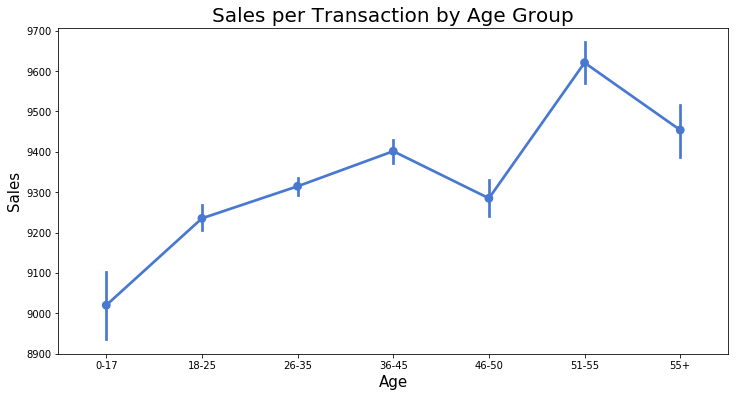

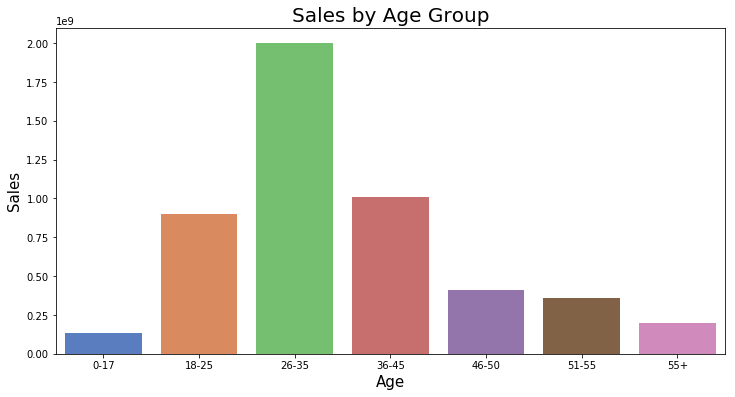

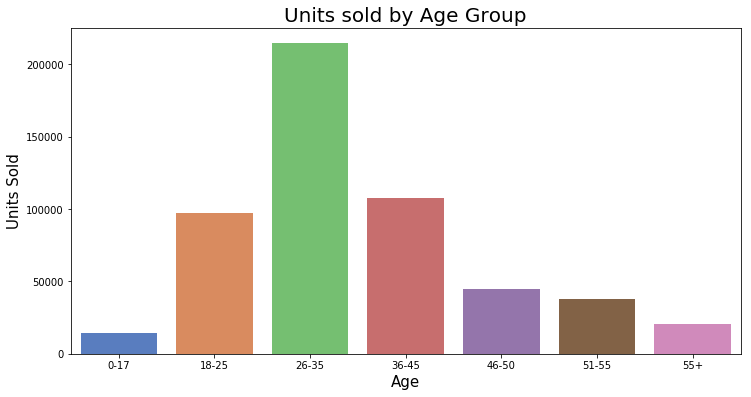

Age
0-17      132659006
18-25     901669280
26-35    1999749106
36-45    1010649565
46-50     413418223
51-55     361908356
55+       197614842
Name: Purchase, dtype: int64

In [8]:
order = ['0-17','18-25','26-35','36-45','46-50','51-55','55+']

#Sales per Transaction by Age Group
plt.figure(figsize=(12,6))
sns.pointplot(x="Age", 
              y="Purchase",
              order=order,
              data=raw_df)
plt.title("Sales per Transaction by Age Group", fontsize=20)
plt.xlabel("Age", fontsize=15)
plt.ylabel("Sales", fontsize=15)
plt.show()

#Sales totals by Age Group
plt.figure(figsize=(12,6))
sns.barplot(x="Age", 
            y="Purchase", 
            ci=None,
            data=raw_df, 
            order=order,
            estimator=np.sum)
plt.title("Sales by Age Group", fontsize=20)
plt.xlabel("Age", fontsize=15)
plt.ylabel("Sales", fontsize=15)
plt.show()

#Unit totals by Age Group
plt.figure(figsize=(12,6))
sns.countplot(x="Age", 
              order=order,
              data=raw_df)
plt.title("Units sold by Age Group", fontsize=20)
plt.xlabel("Age", fontsize=15)
plt.ylabel("Units Sold", fontsize=15)
plt.show()

age_by_sales = raw_df.groupby('Age')['Purchase'].sum()
age_by_sales

As you can see, age group 26-35 spent the most money during Black Friday. Let's compare the different age groups to see if there is a difference in the distributions

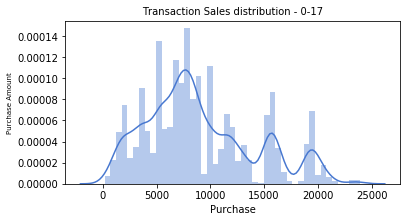

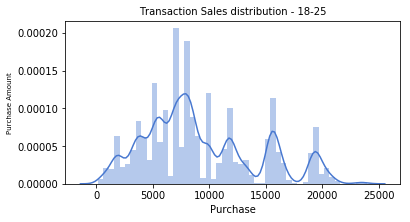

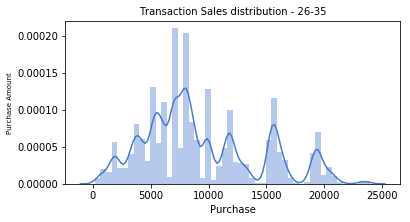

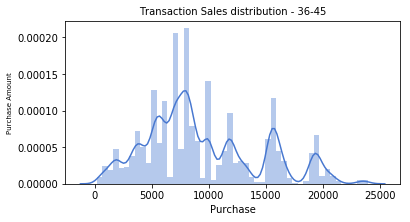

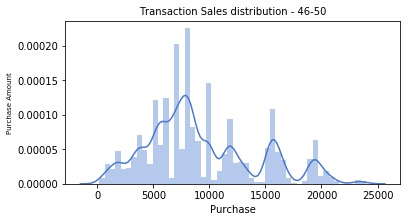

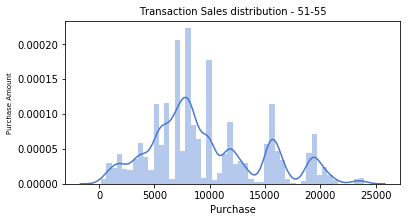

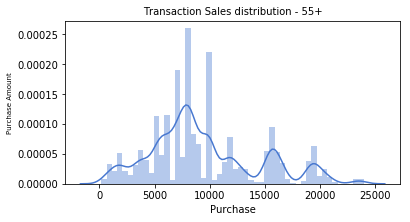

In [9]:
for age in order: 
    plt.figure(figsize=(6,3))
    sns.distplot(raw_df[raw_df.Age==age].Purchase)
    plt.title("Transaction Sales distribution - {}".format(age),fontsize=10)
    plt.ylabel("Purchase Amount", fontsize=7)
    plt.show()

Spending per transaction looks to be similar across age groups. Let's check to see how sales totals for age groups vary via Product Categories. 

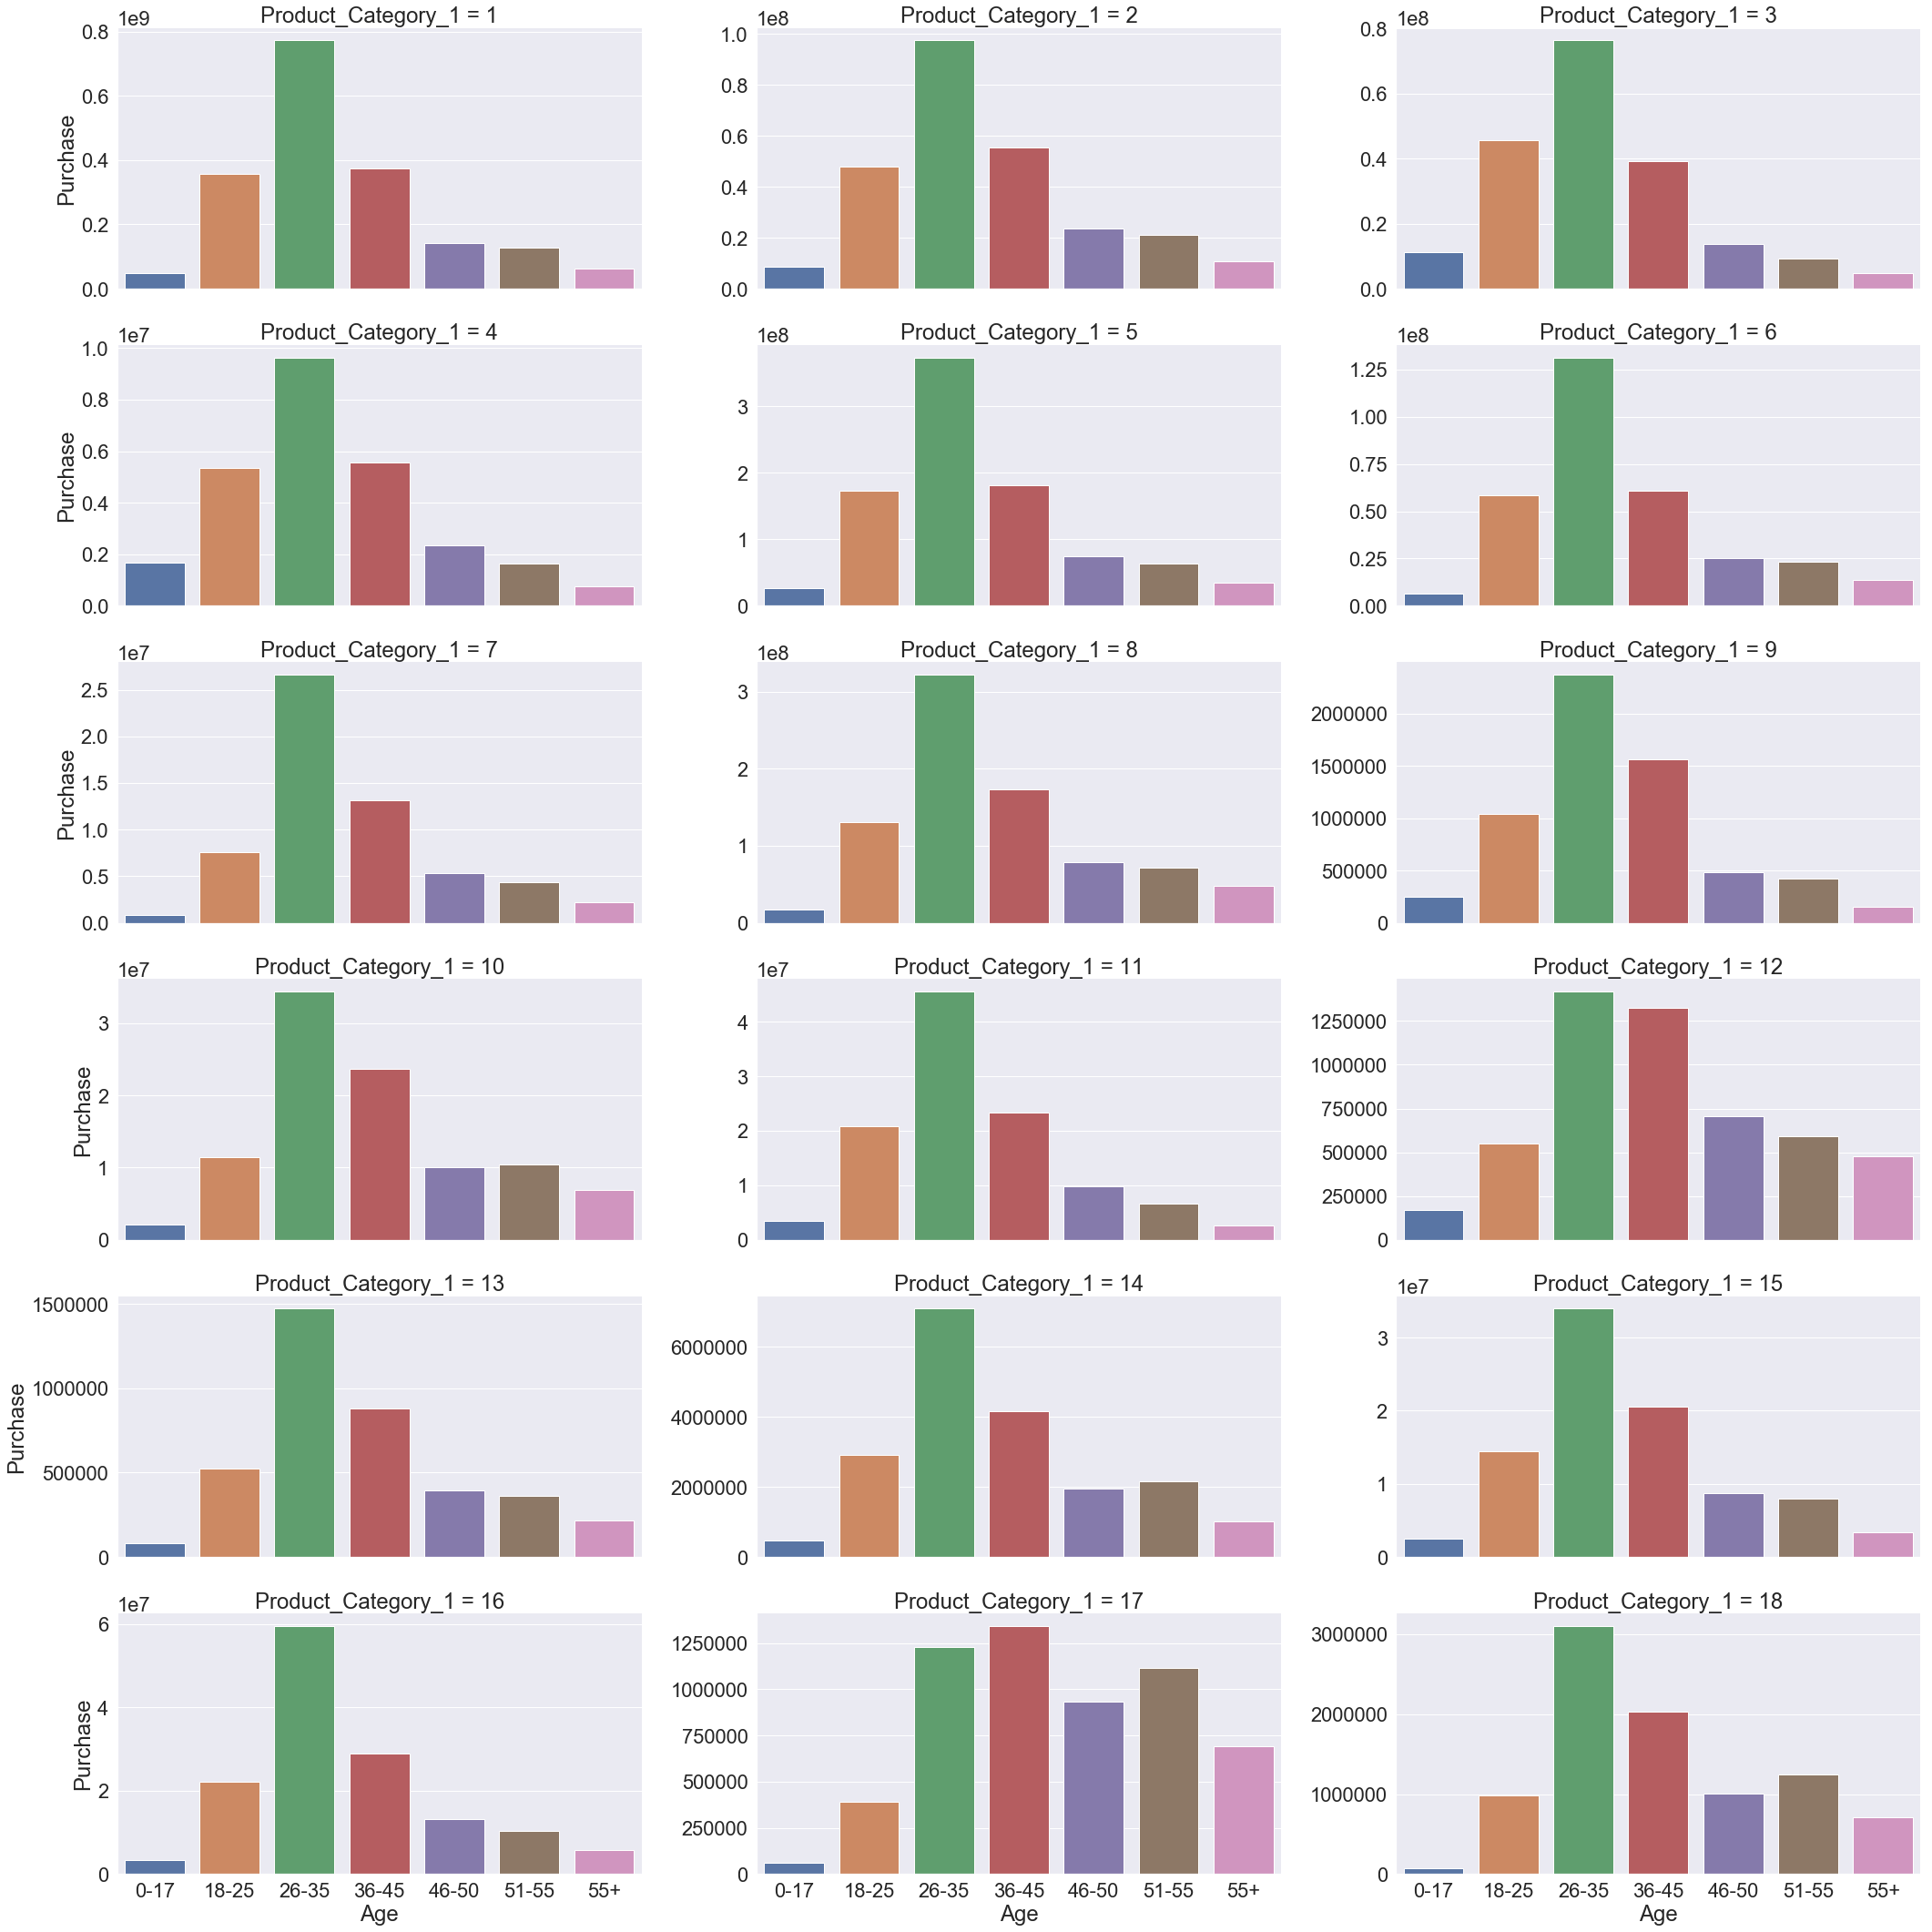

In [10]:
sns.set(font_scale=2)
sns.catplot(x='Age',y='Purchase',kind='bar',
            data=raw_df, estimator=np.sum,ci=None,
            col="Product_Category_1",col_wrap=3,order=order,
            height=5, aspect=2,sharey=False)

plt.show()

##### Observation: Summary of Age Groups

There are three observations we can see within the above visualizations.

First observation we notice regarding the age group variable is that people within the 51-55 age group spent the most money on average. However, in total, people within the 26-35 age group spent the most money and bought the most items on Black Friday. People within age group 36-45 and 18-25 spent the second and third most, respectively. In regards to marketing, we could target non-customers within the 18-45 age group in order to increase sales, or we can target current customers outside of the 18-45 age group in order to increase sales.   

Secondly, we notice that the spend per transaction distribution is similar for all age groups. This could mean the following:
- There are certain products that cost more than others, leading customers to spend more money during transaction.
- We have certain loyalty customers who spend more money per transaction than others.
- There were customers taking advantage of our Black Friday sales within each age group.
- There is a typical amount of money people spend within our stores (certain average). 

For the third observation, we notice that for all of the product categories, except for one, the 26-35 age group spent the most money. However, in regards to marketing, marketing spend will vary for each product category, as some product categories sell higher than others by age group, which will affect marketing ROI. 

Please note the following:
- 18-25 age group is not as large as the other two high spending age groups. Therefore, we may have a higher marketing ROI since we are marketing to less people (smaller group). 
- 46-55 age group were split into two groups. If these age groups were in one group, it would be considered an high selling age group. 
- People 46 and older like products within product category 17.
- 26-35 age group spent almost 2 billion dollars.
- This dataset is skewed towards people within the age of 18-45 (especially 26-35), which confirms that people within this age group could be our target audience in regards to marketing.


### Let's check gender, occupation and marital status and how that affects spending:

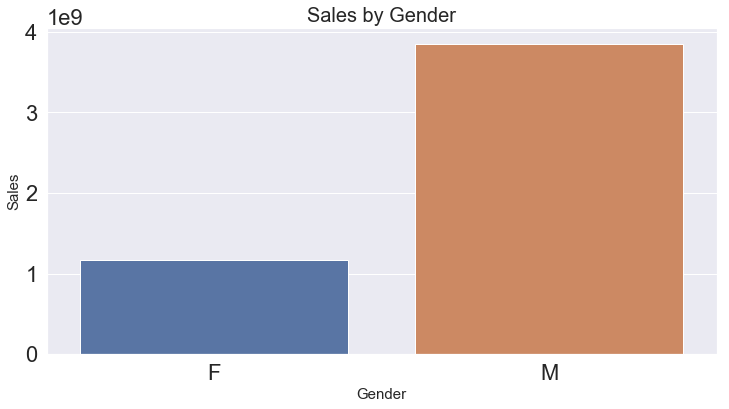

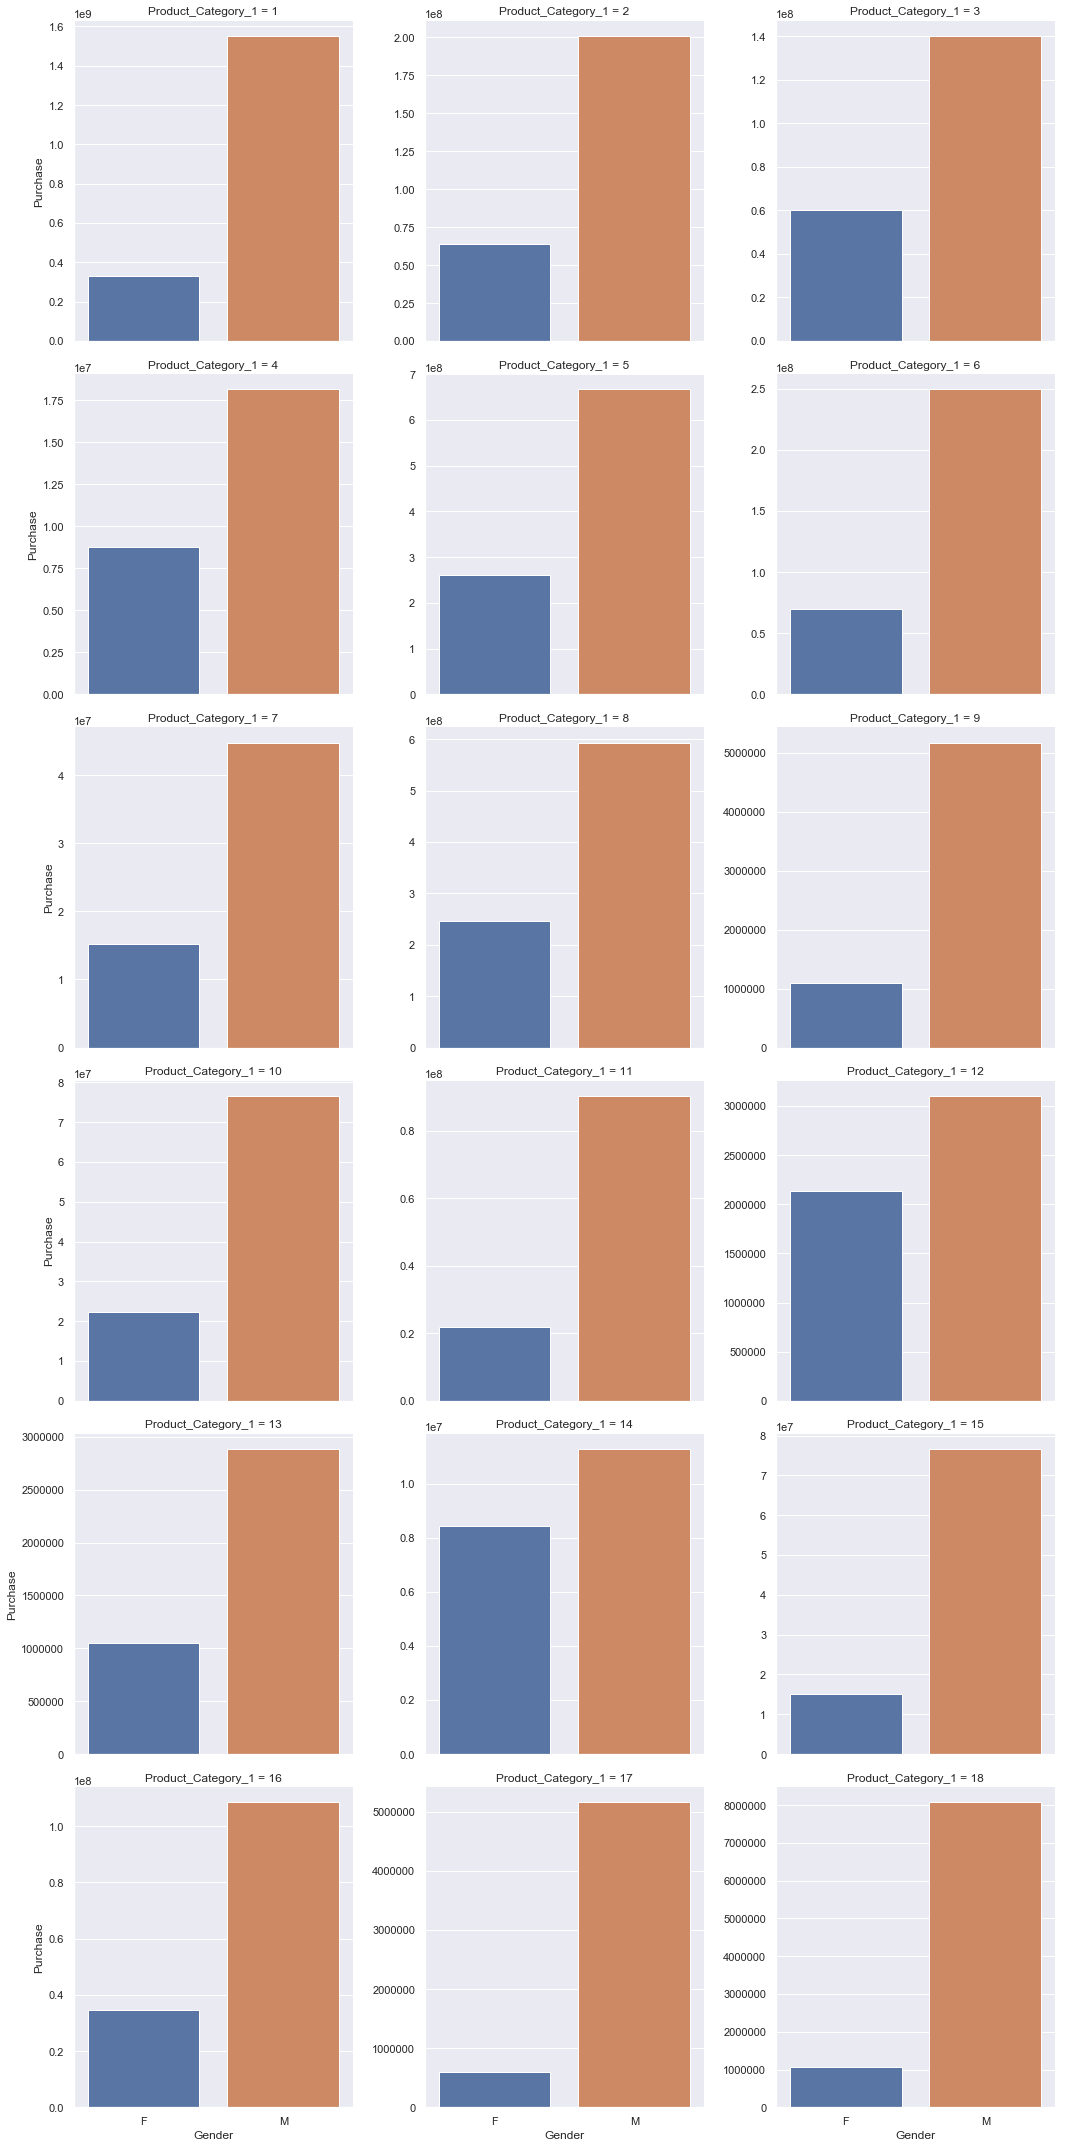

In [11]:
#Sales totals by Gender
plt.figure(figsize=(12,6))
sns.barplot(x="Gender", 
            y="Purchase", 
            ci=None,
            data=raw_df, 
            estimator=np.sum)
plt.title("Sales by Gender", fontsize=20)
plt.xlabel("Gender", fontsize=15)
plt.ylabel("Sales", fontsize=15)
plt.show()

#Gender Sales by Product Category
sns.set(font_scale=1)
sns.catplot(x='Gender',y='Purchase',kind='bar',
            col="Product_Category_1",col_wrap=3,
            sharey=False,
            data=raw_df, estimator=np.sum,ci=None)
plt.show()

Clearly, males spend more money than females during Black Friday. However, the spending varies depending on product category.

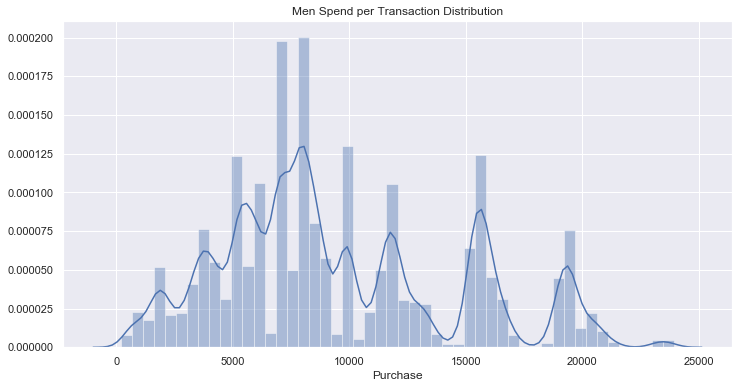

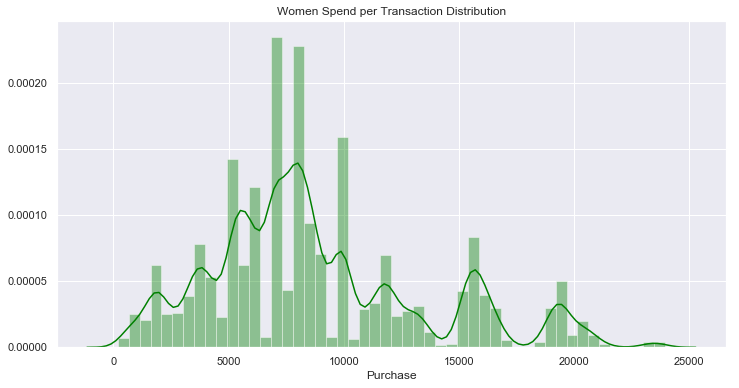

Ttest_indResult(statistic=44.13462293864972, pvalue=0.0)

In [12]:
#men v. women spend per transaction distribution 
plt.figure(figsize=(12,6))
sns.distplot(raw_df[raw_df.Gender=='M'].Purchase)
plt.title('Men Spend per Transaction Distribution')
plt.show()

plt.figure(figsize=(12,6))
sns.distplot(raw_df[raw_df.Gender=='F'].Purchase, color='green')
plt.title('Women Spend per Transaction Distribution')
plt.show()

stats.ttest_ind(raw_df[raw_df.Gender=='M'].Purchase,raw_df[raw_df.Gender=='F'].Purchase,equal_var=True)

###### Observation: Sales by Gender

We can see that males more than double the spending of females within our stores in regards to total sales. That spending gap varies when viewing Product Sales by Gender, examples would be product catgories 4, 12 and 14. When reviewing the spending distribution, you can see that males and females spend the same amount of money per transaction. This leads us to similar conclusions we determined while reviewing the Age Group variable. 

However, it would be interesting to know if more men visited our stores during Black Friday than women. If this was the case, then that would justify why male spending is much higher than female spending. If this was not the case, then we would need to figure out why we are not converting more female sales. 

Now let's visualize sales by occupation.  

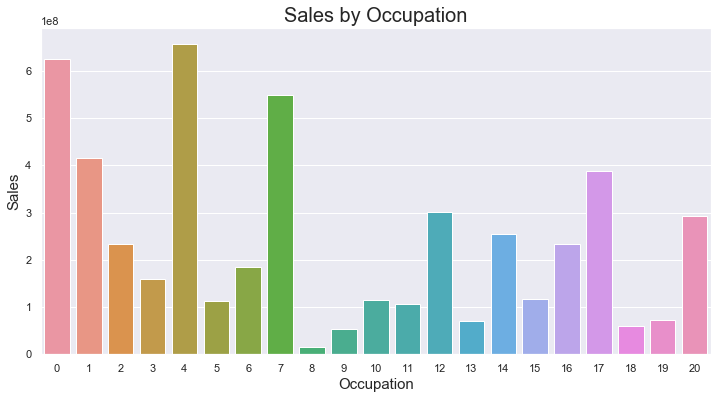

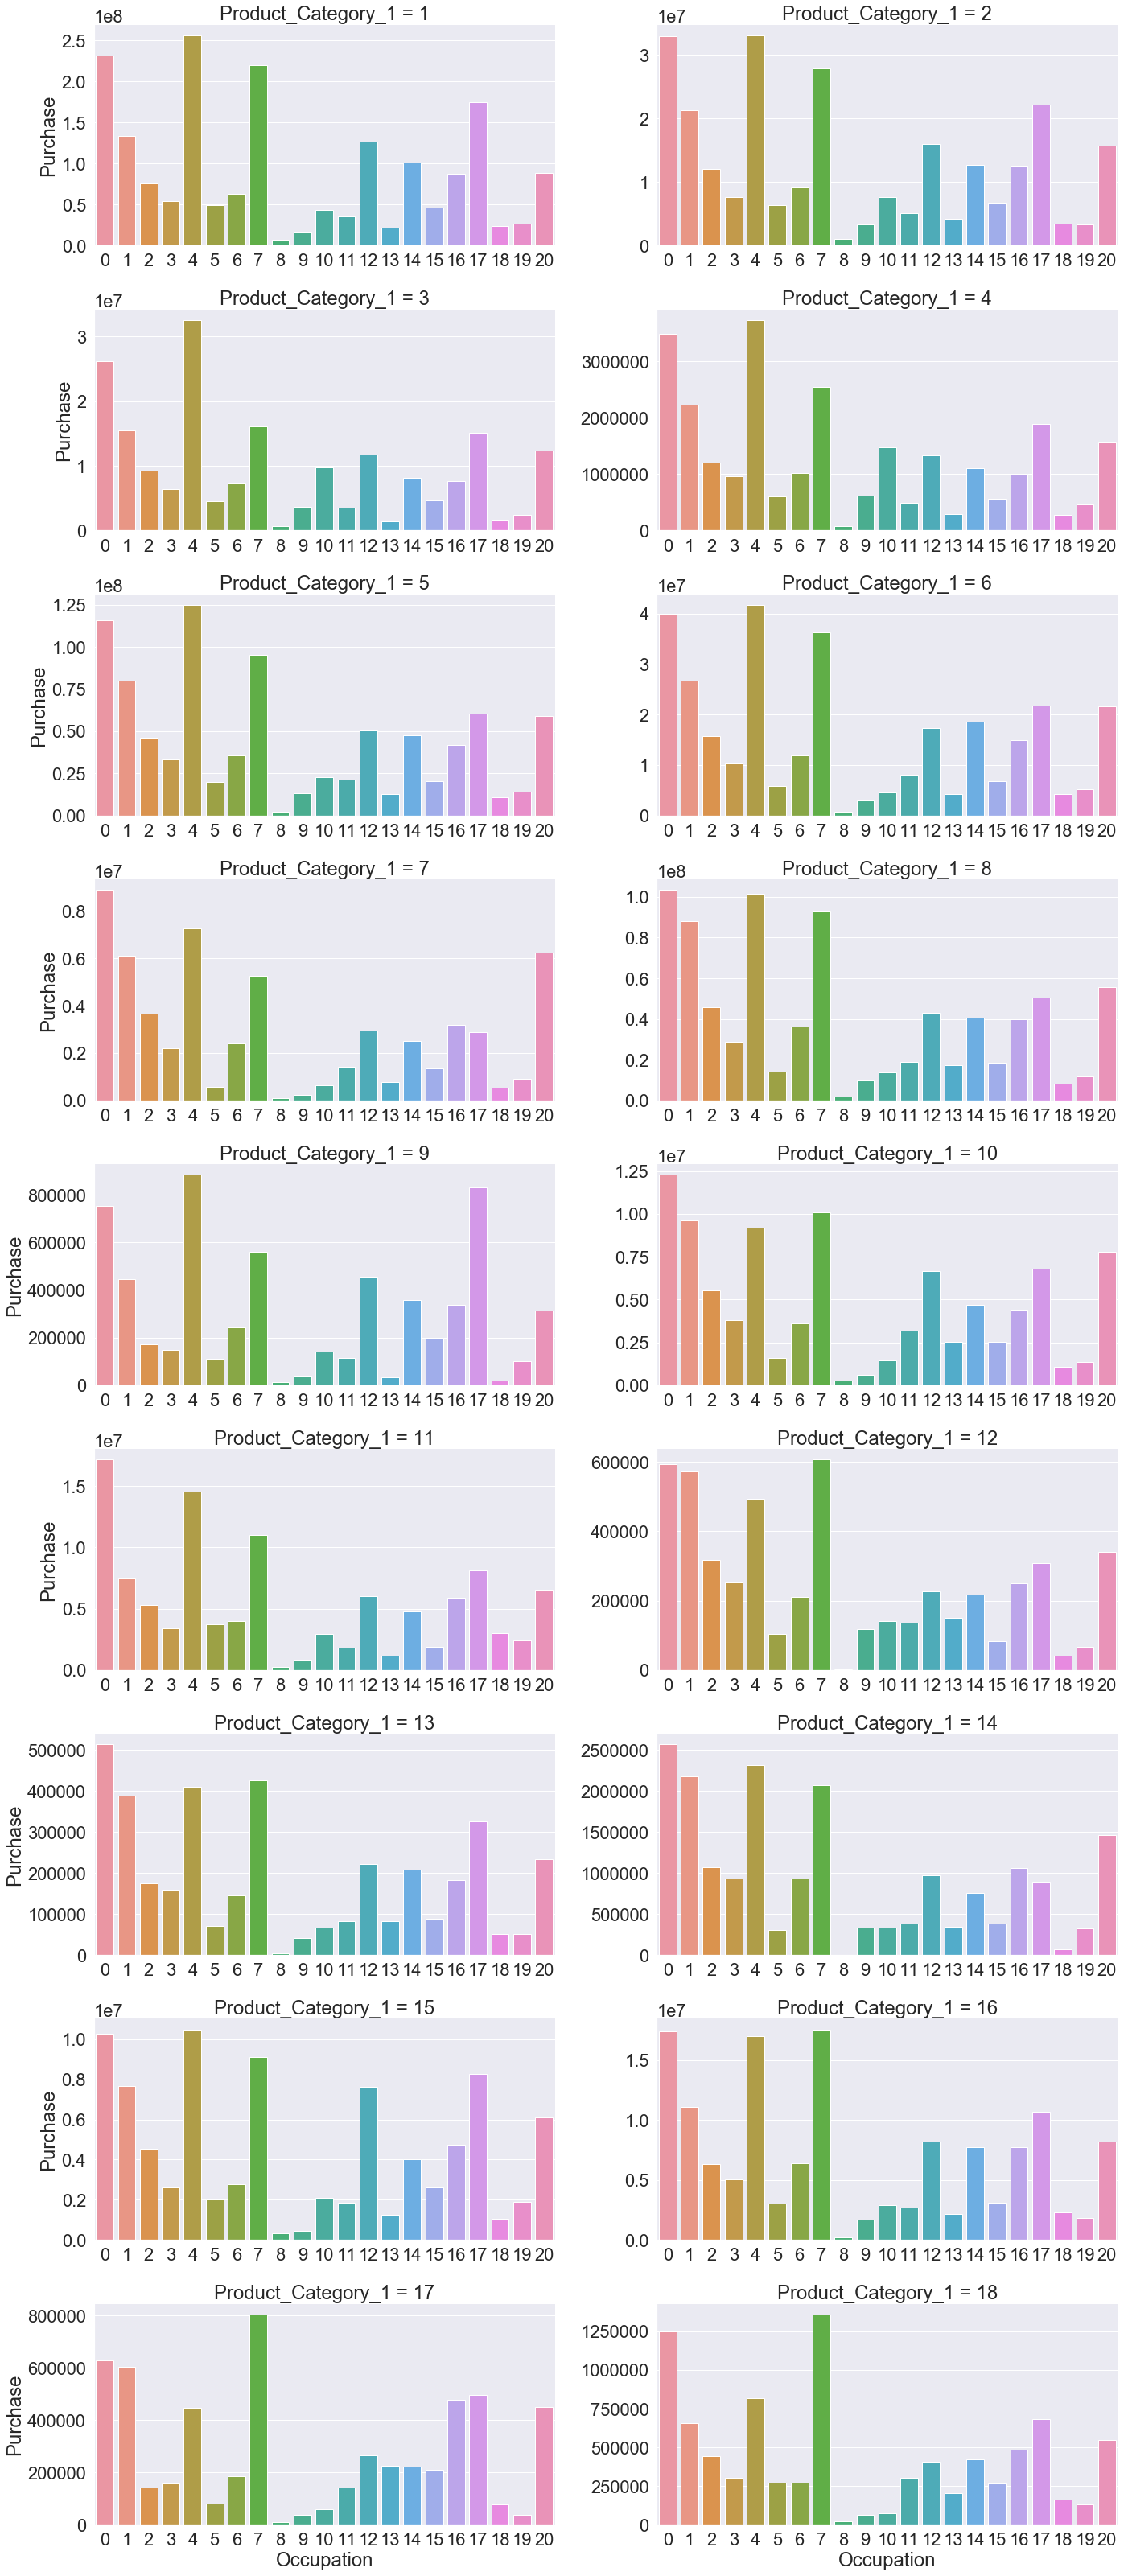

In [13]:
#Sales totals by Occupation
plt.figure(figsize=(12,6))
sns.barplot(x="Occupation", 
            y="Purchase", 
            ci=None,
            data=raw_df, 
            estimator=np.sum)
plt.title("Sales by Occupation", fontsize=20)
plt.xlabel("Occupation", fontsize=15)
plt.ylabel("Sales", fontsize=15)
plt.show()

#Occupation Sales by Product Category 
sns.set(font_scale=2)
sns.catplot(x='Occupation',y='Purchase',kind='bar',
            col="Product_Category_1",col_wrap=2,
            sharey=False, height=5, aspect=2,sharex=False,
            data=raw_df, estimator=np.sum,ci=None)

plt.show()

###### Observation: Occupation sales

In regards to total sales, customers in occupation groups 4, 0 and 7 spend the most money, respectively. However, that changes when looking at occupation sales by product category. This is important to note, as marketing spend using occupation as a target variable will vary per Product Category. For an example, we may spend more money marketing products in category 17 to potential customers within occupation group 7, than we would of potential customers within occupation group 4. This is because sales from current customers within occupation group 7 are higher than thoses from current customers within group 4. Using these insights could help us to increase marketing ROI. 

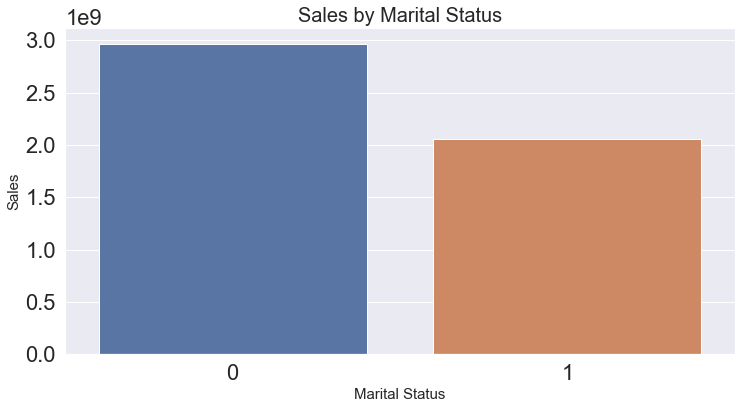

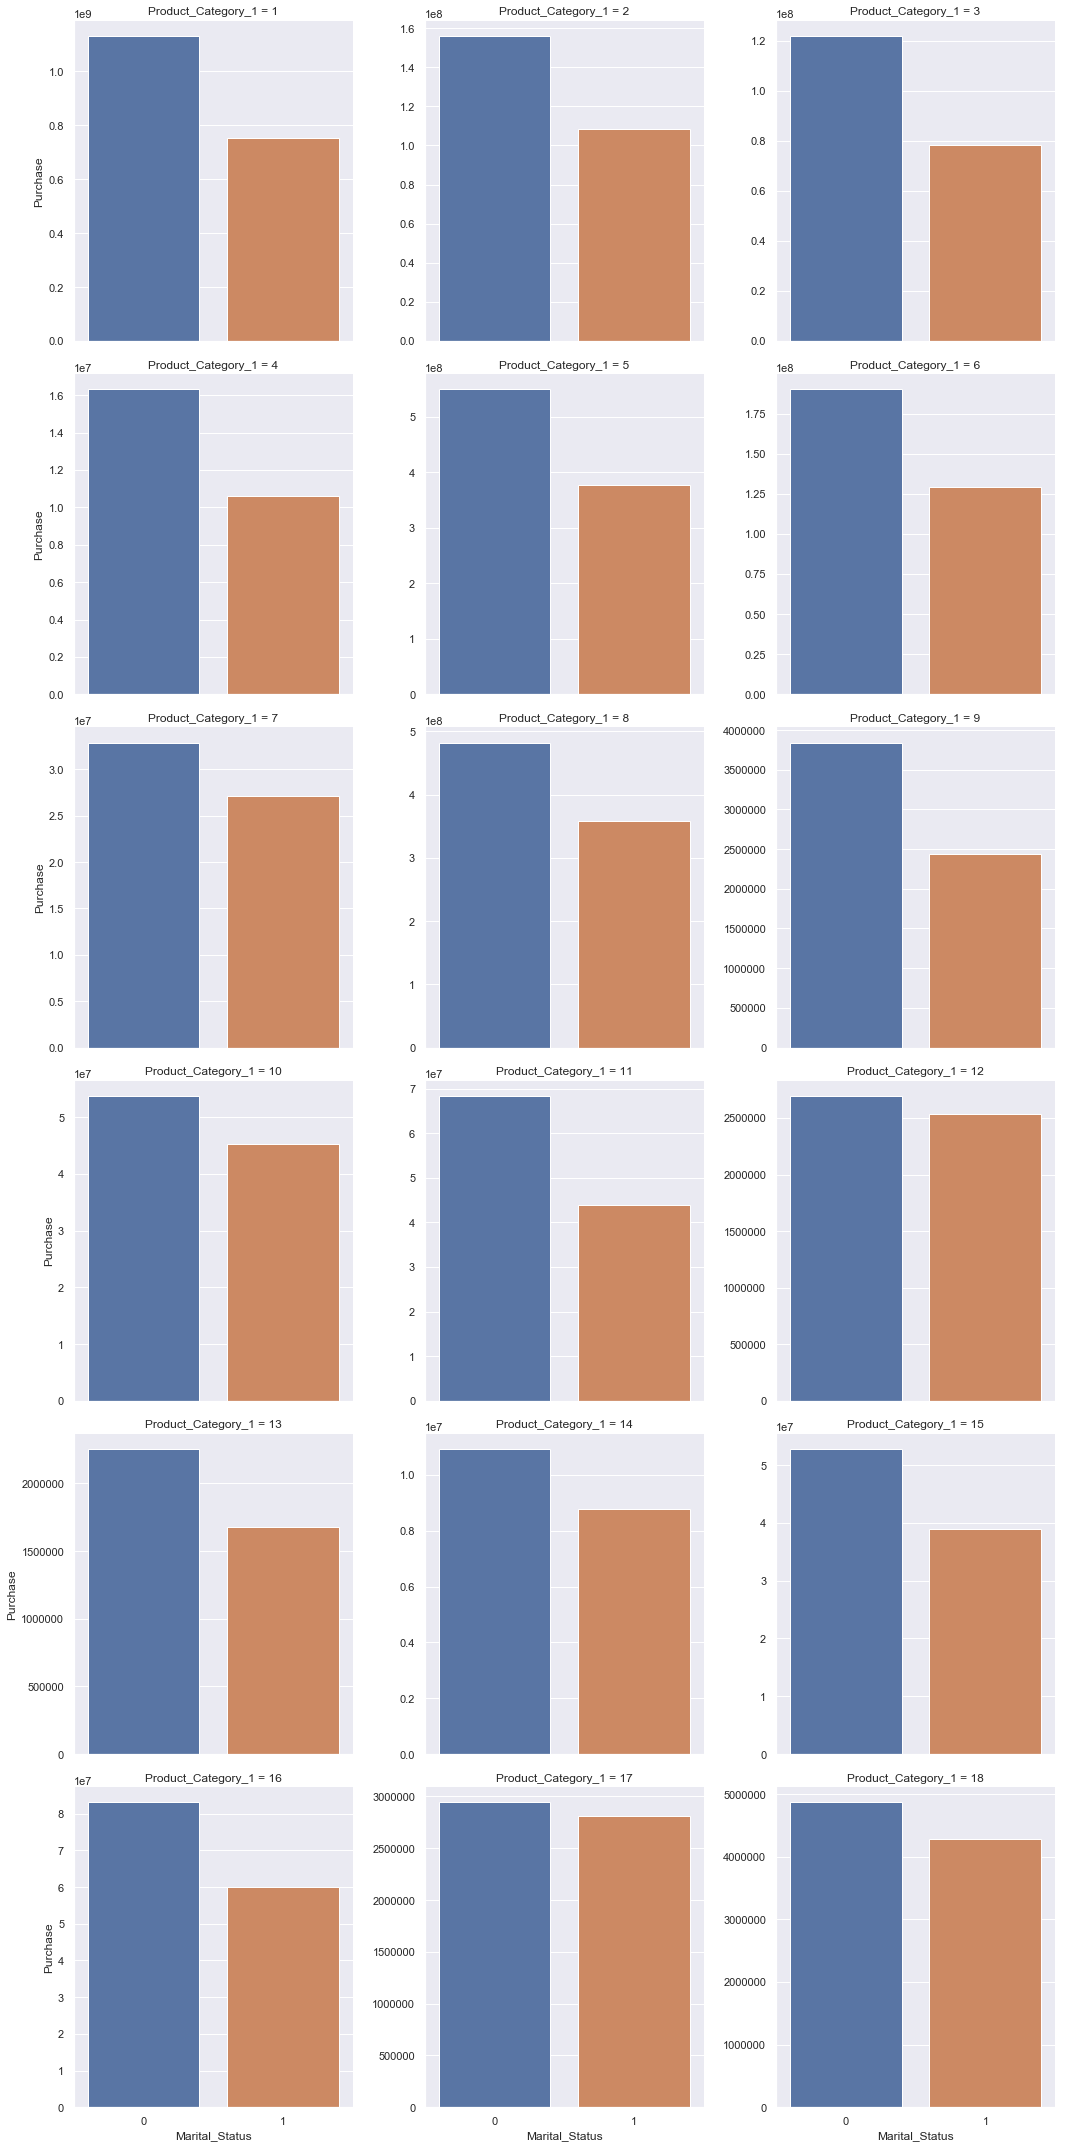

In [14]:
#Sales totals by Marital Status
plt.figure(figsize=(12,6))
sns.barplot(x="Marital_Status", 
            y="Purchase", 
            ci=None,
            data=raw_df, 
            estimator=np.sum)
plt.title("Sales by Marital Status", fontsize=20)
plt.xlabel("Marital Status", fontsize=15)
plt.ylabel("Sales", fontsize=15)
plt.show()

#Marital Status Sales by Product Category
sns.set(font_scale=1)
sns.catplot(x='Marital_Status',y='Purchase',kind='bar',
            col="Product_Category_1",col_wrap=3,
            sharey=False,
            data=raw_df, estimator=np.sum,ci=None)

plt.show()

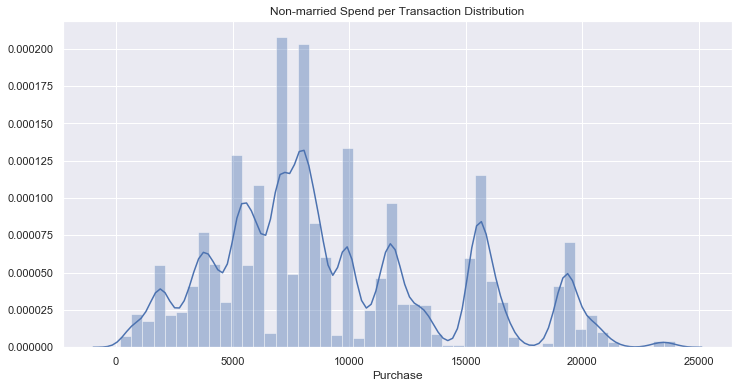

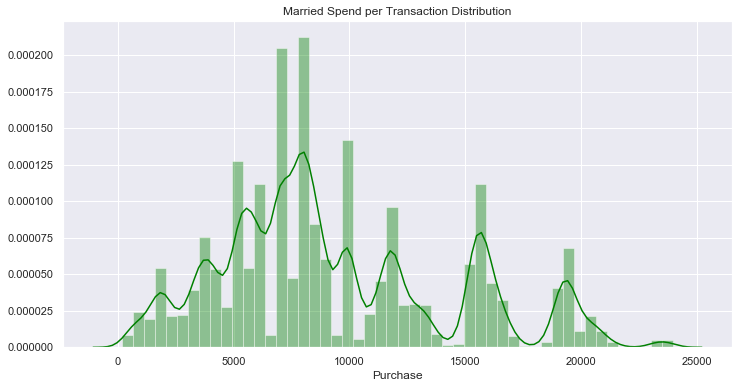

In [15]:
#married v. non-married spend per transaction distribution 
plt.figure(figsize=(12,6))
sns.distplot(raw_df[raw_df.Marital_Status==0].Purchase)
plt.title('Non-married Spend per Transaction Distribution')
plt.show()

plt.figure(figsize=(12,6))
sns.distplot(raw_df[raw_df.Marital_Status==1].Purchase, color='green')
plt.title('Married Spend per Transaction Distribution')
plt.show()

###### Observation: Marital Status

More non-married people shop in our stores in comparison to married people. The spending distribution per transaction between the two are very similar. When looking at marital status vs. product categories, non-married people spend the most money in each product category, however, the gap between married v. non-married varies. This is great to know for marketing purposes. If our marketing team were to use this, they may increase marketing spend targeting non-married potential customers since our non-married customers spend more money then married customers. Similar to the other variables, spend per transaction is similar between married and non-married customers. Before we move to feature Selection, let's take a look at Target Variables. 

### Target Variables' Distribution 

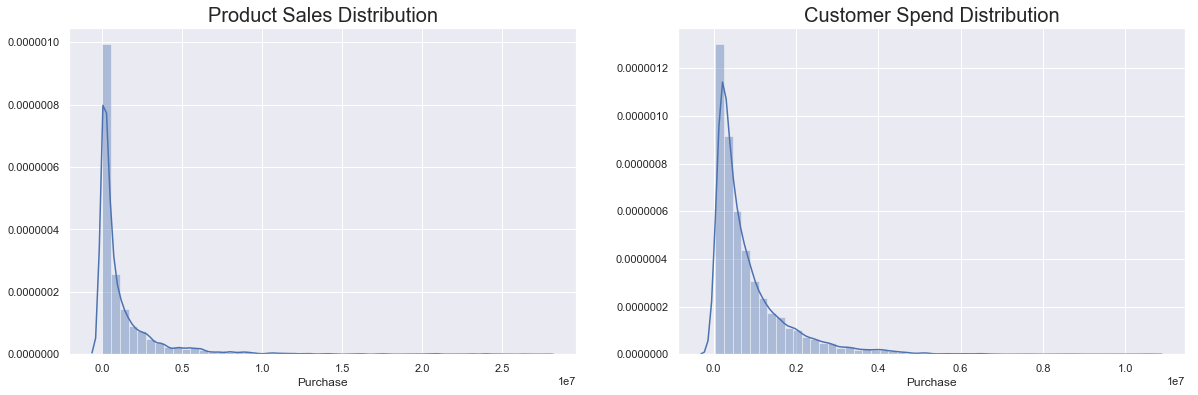

In [16]:
print('\n')
# Target Variable Distribution  
fig, axs = plt.subplots(ncols=2, figsize=(20,6))
sns.distplot(raw_df.groupby(['Product_ID'])['Purchase'].sum(), ax=axs[0])
axs[0].set_title('Product Sales Distribution', fontsize=20)
sns.distplot(raw_df.groupby(['User_ID'])['Purchase'].sum(), ax=axs[1])
axs[1].set_title('Customer Spend Distribution', fontsize=20)
plt.show()

###### Observation: Target Variables

From an overview, both distributions resemble Pareto's law. This means that 20% of the variables account for 80% of the variance. For product sales, the majority of total sales are below 5,000,000. For Customer spend, the majority of customers spend 2,000,000 on an order. 

If we were to remove some of the higher products, and some of the high order sales, we would see that the distribution is normal. 

Since the variables are continual, we will treat this as a regression problem. 

### Conclusion

Based on the data exploration, our target demographic are within the age group of 26-35, male, non-married and have an occupation within 0, 4 or 7 occupation groups. In regards to marketing to potential customers, these are the demographics our marketing team should target, as this may bring us the highest marketing ROI. If I we were trying to increase sales outside of the target audience, I would target people within the age group of 46-55, as they spend the 4th most amount of money during Black Friday. 

# Feature Engineering and Modeling 

- Create two specialize dataframes for product_IDs (predicting product sales), and user_IDs (predicting customer spend) respectively 
- Complete Feature Selection and Train Models for each dataframe 
- Optimize each model using GridSearchCV
- Check for accuracy 

## Create Dataframes

First we will transform our raw data in order to get the most information on each of our products. This will help us to predict product sales. Next, we will transform our raw data in order to get the most information on each customer. This will help us to predict customer spend within our stores. 

Let's create the dataframe for product sales: 

#### Product_ID Dataframe 

The Product_Item Dataframe will be used to predict the sales of each unique product. The dataframe will consist of 3623 unique products. We will use the below variables to help predict product sales: 
- **Age Count and percentage**: How many people within each age group bought the product and the percentage.
- **Gender Count and percentage**: How many people within each gender group bought the product and the percentage.
- **Product Category Count**: How many product categories represent the product (out of 3).
- **Product Category Dummies**: Is the product represented by the product category (binomial variable).
- **Occupation Count and percentage**: How many people within each occupation group bought the product, as well as the percentage.
- **Stay_in_Current_City_years Count and percentage**: How many people within stay in current city - years group have purchased the product, and the percentage. 
- **Marital Status Count and percentage**: How many people within each marital status has bought the product, and the percentage.
- **City Count and percentage**: How many people within each city group has bough the product, and the percentage 
- **How many users bought product** 

The total size of the dataframe will be (3623,105), meaning we will have 104 independent variables to help predict the target variable (product sales). 

In [17]:
product_df = raw_df.copy()
product_df.fillna(0,inplace=True)

# create dataframe of gender totals by Product_ID
product_ml_df = product_df.pivot_table(values='Purchase',
                                       index='Product_ID',
                                       columns='Gender',
                                       aggfunc=np.ma.count) 

# create dataframe of gender totals by Product_ID
for col in list(product_ml_df.columns):
    product_ml_df["{}_%".format(col)] = product_ml_df[col]/product_ml_df.sum(axis=1)
    product_ml_df.rename_axis(None,axis=1,inplace=True)

product_ml_df.rename_axis(None,axis=1,inplace=True)

columns = ['Age','Occupation','City_Category',
           'Stay_In_Current_City_Years','Marital_Status']

# create new dataframe of column variable totals by Product_ID
for col in columns: 
    df1 = product_df.copy()
    df1[col]=df1[col].apply(lambda x: "{}_{}".format(x,col))
    df = df1.pivot_table(values='Purchase',
                                index='Product_ID',
                                columns=col, fill_value=0,
                                aggfunc=np.ma.count)
    # add columns for variable percentages by Product_ID
    for col in list(df.columns):
        df["{}_%".format(col)] = df[col]/df.sum(axis=1)
        df.rename_axis(None,axis=1,inplace=True)
    
    product_ml_df = product_ml_df.join(df,on="Product_ID",how="outer")   

# join dataframes 
product_ml_df = product_ml_df.join(product_df.groupby('Product_ID')['Purchase'].sum(),
                                   on="Product_ID",
                                   how="outer")
print(product_ml_df.columns)
product_ml_df.head()

Index(['F', 'M', 'F_%', 'M_%', '0-17_Age', '18-25_Age', '26-35_Age',
       '36-45_Age', '46-50_Age', '51-55_Age', '55+_Age', '0-17_Age_%',
       '18-25_Age_%', '26-35_Age_%', '36-45_Age_%', '46-50_Age_%',
       '51-55_Age_%', '55+_Age_%', '0_Occupation', '10_Occupation',
       '11_Occupation', '12_Occupation', '13_Occupation', '14_Occupation',
       '15_Occupation', '16_Occupation', '17_Occupation', '18_Occupation',
       '19_Occupation', '1_Occupation', '20_Occupation', '2_Occupation',
       '3_Occupation', '4_Occupation', '5_Occupation', '6_Occupation',
       '7_Occupation', '8_Occupation', '9_Occupation', '0_Occupation_%',
       '10_Occupation_%', '11_Occupation_%', '12_Occupation_%',
       '13_Occupation_%', '14_Occupation_%', '15_Occupation_%',
       '16_Occupation_%', '17_Occupation_%', '18_Occupation_%',
       '19_Occupation_%', '1_Occupation_%', '20_Occupation_%',
       '2_Occupation_%', '3_Occupation_%', '4_Occupation_%', '5_Occupation_%',
       '6_Occupation_%',

,F,M,F_%,M_%,0-17_Age,18-25_Age,26-35_Age,36-45_Age,46-50_Age,51-55_Age,...,0_Stay_In_Current_City_Years_%,1_Stay_In_Current_City_Years_%,2_Stay_In_Current_City_Years_%,3_Stay_In_Current_City_Years_%,4+_Stay_In_Current_City_Years_%,0_Marital_Status,1_Marital_Status,0_Marital_Status_%,1_Marital_Status_%,Purchase
Product_ID,,,,,,,,,,,,,,,,,,,,,
P00000142,342.0,788.0,0.302655,0.697158,55,256,436,221,81,56,...,0.141593,0.367211,0.183988,0.170692,0.136179,706,424,0.624779,0.375014,12592163
P00000242,89.0,282.0,0.239892,0.759617,19,86,130,78,25,26,...,0.129380,0.328726,0.191139,0.196422,0.153289,234,137,0.630728,0.368646,3914901
P00000342,67.0,171.0,0.281513,0.717639,11,48,93,35,13,23,...,0.130252,0.369546,0.222222,0.146614,0.129778,143,95,0.600840,0.398155,1261383
P00000442,46.0,46.0,0.500000,0.497297,2,18,46,17,4,3,...,0.152174,0.368955,0.172933,0.129458,0.172370,54,38,0.586957,0.410425,441173
P00000542,50.0,96.0,0.342466,0.655996,9,33,55,32,7,9,...,0.095890,0.335396,0.198045,0.197778,0.170268,101,45,0.691781,0.306766,791219


As you can see, we created columns of value counts and percentages for each customer demographic variable. Now, we will add the product's categories, product category dummies, how many categories represent eact product, and unit counts for each product. 

In [18]:
# create dataframe for product_categories by Product_ID to create dummy categorical variables 
prod_cat_df = raw_df.copy()
prod_cat_df.drop_duplicates(subset="Product_ID",inplace=True)

prod_cat_df=prod_cat_df[['Product_ID',
                 'Product_Category_1',
                 'Product_Category_2',
                 'Product_Category_3']]

prod_cat_df['Cat_total']=prod_cat_df[['Product_Category_1',
                              'Product_Category_2',
                              'Product_Category_3']].count(axis=1)

prod_cat_df['Product_Category_1'] = prod_cat_df['Product_Category_1'].astype(float)

cat_list = list(prod_cat_df.Product_Category_1.unique())
cat_list.sort()

for cat in cat_list: 
    prod_cat_df['Category_{}_dummies'.format(cat)] = 0

    
x = 'Product_Category_1'
y = 'Product_Category_2'
z = 'Product_Category_3'

for index, row in prod_cat_df.iterrows():
    a = row[x]
    b = row[y]
    c = row[z]
    lis = [a,b,c]
    for letter in lis: 
        if letter == None:
            pass 
        else:
            prod_cat_df.loc[index,'Category_{}_dummies'.format(letter)] = 1   

            
prod_cat_df.set_index("Product_ID",inplace=True)  
print("Product Category Dummies Dataframe:")
prod_cat_df.head()

Product Category Dummies Dataframe:


,Product_Category_1,Product_Category_2,Product_Category_3,Cat_total,Category_1.0_dummies,Category_2.0_dummies,Category_3.0_dummies,Category_4.0_dummies,Category_5.0_dummies,Category_6.0_dummies,...,Category_10.0_dummies,Category_11.0_dummies,Category_12.0_dummies,Category_13.0_dummies,Category_14.0_dummies,Category_15.0_dummies,Category_16.0_dummies,Category_17.0_dummies,Category_18.0_dummies,Category_nan_dummies
Product_ID,,,,,,,,,,,,,,,,,,,,,
P00069042,3.0,NaN,NaN,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
P00248942,1.0,6.0,14.0,3,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,NaN
P00087842,12.0,NaN,NaN,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1.0
P00085442,12.0,14.0,NaN,2,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1.0
P00285442,8.0,NaN,NaN,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0


Above is the dataframe that represents the product categories, total amount of categories that represent each product, and product category dummies. We will join the above dataframe to the main products dataframe. 

Let's create a new data frame for the units sold of each product. 

In [19]:
# add product category dummies to product dataframe
product_ml_df = product_ml_df.join(prod_cat_df,on="Product_ID",how="outer")
product_ml_df.fillna(0,inplace=True)

# add product unit counts to product_ml_df 
product_count = product_df.groupby(['Product_ID'])['Purchase'].count().to_frame()
product_count.columns = ['unit_count']
print("Unit count for each category:")
product_count.head()

Unit count for each category:


,unit_count
Product_ID,
P00000142,1130
P00000242,371
P00000342,238
P00000442,92
P00000542,146


Now that we have the unit sold count for each product, let's join it to the products dataframe:

In [20]:
product_ml_df = product_ml_df.join(product_count,on="Product_ID",how="outer")
product_ml_df.shape

(3623, 105)

In [21]:
product_ml_df.columns

Index(['F', 'M', 'F_%', 'M_%', '0-17_Age', '18-25_Age', '26-35_Age',
       '36-45_Age', '46-50_Age', '51-55_Age',
       ...
       'Category_11.0_dummies', 'Category_12.0_dummies',
       'Category_13.0_dummies', 'Category_14.0_dummies',
       'Category_15.0_dummies', 'Category_16.0_dummies',
       'Category_17.0_dummies', 'Category_18.0_dummies',
       'Category_nan_dummies', 'unit_count'],
      dtype='object', length=105)

We are now ready to predict sales for each of our products. Before we do, let's create the dataframe that will allow us to predict customer spend. 

#### User_ID Dataframe 

The User_ID Dataframe will help us to predict each customer's spend based on customer demographics and product meta-data. The dataframe will consist 5891 unique customers. We will use the below variables to predict the target variable (customer spend) 

- **Age and Age dummies**: Customers age and binomial variables for each age group. 
- **Gender and gender dummy**: Customers gender and binomial variables for each gender group.
- **Category Count**: How many diffent product categories the customer bought from. 
- **Category Dummies**: Binomial variables of product category (did customer buy from product category?).
- **Occupation and Occupation Dummies**: Customer's occupation and binomial variables for each occupation
- **Stay_in_Current_City_years and Stay_Current_City_dummies**: Customer's tenure in city and binomial variables for tenure in city
- **Marital Status**: Customers marital status 
- **City and City Dummies**: Customers location and binomial variables for customer location  

The dataframe will have a shape of (5891, 64), meaning we will have 63 independent variables to help predict one target variable.

In [22]:
user_df = raw_df.copy()
user_df.drop_duplicates(subset="User_ID",inplace=True)
user_df.drop(['Product_Category_1',
              'Product_Category_2',
              'Product_Category_3',
              'Product_ID',
              'Purchase'],1,inplace=True)


# Get dummies of variables listed below
columns = ['Gender','Age','Occupation',
          'City_Category','Stay_In_Current_City_Years']

for col in columns:
    name = user_df[col].unique()
    column = []
    for name in name:
        column.append("{}_{}".format(col,name))
    
    dummies = pd.get_dummies(user_df[col])
    dummies.columns = column
    
    user_df = pd.concat([user_df,dummies],axis=1)
    

# Add dummy variables for gender     
user_df['Gender'] = np.where(user_df.Gender.str.contains('F'),1,0)    


# Change city category to numerical variables 
category_dic = {'A': 1, 
               'B': 2,
               'C': 3}

for index, row in user_df.iterrows():
    user_df.loc[index,'City_Category'] = category_dic[row['City_Category']]
    

# Change age variable to numerical variables     
Age_dic ={'0-17':1,
         '18-25':2,
         '26-35':3,
         '36-45':4,
         '46-50':5,
         '51-55':6,
         '55+':7}

for index, row in user_df.iterrows():
    user_df.loc[index,'Age'] = Age_dic[row['Age']]    
    

# change stay in city to numerical variable     
stay_dic = {'0':0,
           '1':1,
           '2':2,
           '3':3,
           '4+':4}


for index, row in user_df.iterrows():
    user_df.loc[index,'Stay_In_Current_City_Years'] = stay_dic[row['Stay_In_Current_City_Years']]   

user_df.set_index('User_ID',inplace=True) 
print("User dataframe:")
user_df.head()

User dataframe:


,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Gender_F,Gender_M,Age_0-17,Age_55+,...,Occupation_13,Occupation_6,City_Category_A,City_Category_C,City_Category_B,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_4+,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_0
User_ID,,,,,,,,,,,,,,,,,,,,,
1000001,1,1,10,1,2,0,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
1000002,0,7,16,3,4,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
1000003,0,3,15,1,3,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1000004,0,5,7,2,2,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
1000005,0,3,20,1,1,1,0,1,0,0,...,0,1,1,0,0,0,1,0,0,0


As you can see, for our object variables, we change them to numerical. Categorical variables that could have more than two values (example, Age variable) were tranformed into dummy categories as well.

Now let's add how many products the customer bought in each category, as well as the total amount of categories our customers purchased products within. 

In [23]:
user = raw_df.copy()

#Create pivot tables for each product category column 
user['Product_Category_1'] = user['Product_Category_1'].astype(float)

user1 = raw_df.copy()
user2 = raw_df.copy()

user = user.pivot_table(values='Purchase',
                 index='User_ID',
                 columns=['Product_Category_1'], fill_value=0,
                 aggfunc=np.ma.count) 

user.columns = user.columns.astype(str)

user1 = user1.pivot_table(values='Purchase',
                 index='User_ID',
                 columns=['Product_Category_2'], fill_value=0,
                 aggfunc=np.ma.count) 

user1.columns = user1.columns.astype(str)

user2 = user2.pivot_table(values='Purchase',
                 index='User_ID',
                 columns=['Product_Category_3'], fill_value=0,
                 aggfunc=np.ma.count) 

user2.columns = user2.columns.astype(str)

# Add product category columns together 
for col in user1.columns:
    user[col] = user[col] + user1[col]
    
for col in user2.columns: 
    user[col] = user[col] + user2[col]    
    
user[user == 0.0] = None
user[user == 0] = None 

columns = []
for col in user.columns:
    columns.append("category_{}".format(col))
    
user.columns = columns

user['category_count'] = user.count(axis=1)
user.fillna(0, inplace=True)  

print("User product dataframe:")
user.head()

User product dataframe:


,category_1.0,category_2.0,category_3.0,category_4.0,category_5.0,category_6.0,category_7.0,category_8.0,category_9.0,category_10.0,category_11.0,category_12.0,category_13.0,category_14.0,category_15.0,category_16.0,category_17.0,category_18.0,category_count
User_ID,,,,,,,,,,,,,,,,,,,
1000001,4.0,3.0,11.0,13.0,5.0,2.0,0.0,13.0,2.0,0.0,0.0,8.0,0.0,3.0,1.0,2.0,2.0,0.0,13
1000002,31.0,9.0,0.0,0.0,15.0,9.0,0.0,46.0,1.0,1.0,2.0,0.0,3.0,10.0,7.0,14.0,7.0,1.0,14
1000003,15.0,15.0,1.0,1.0,15.0,0.0,0.0,6.0,0.0,0.0,2.0,0.0,0.0,3.0,1.0,2.0,0.0,4.0,11
1000004,13.0,4.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0,2.0,0.0,0.0,2.0,5.0,3.0,1.0,0.0,10
1000005,18.0,5.0,2.0,4.0,26.0,9.0,5.0,57.0,0.0,1.0,5.0,2.0,4.0,13.0,6.0,21.0,2.0,0.0,16


In the above dataframe, we are tracking how many products a customer bought within each category and the total unique category count. We will join this dataframe with user_df.

Now we will create a dataframe for our target variable (amount of money spent per customer) and add it to user_df as well. 

In [24]:
user_money_spent = raw_df.groupby('User_ID')['Purchase'].sum()
user_money_spent = user_money_spent.to_frame()

# Join dataframes together 
user_df = user_df.join(user, how='outer')
user_df = user_df.join(user_money_spent, how='outer')

In [25]:
user_df.shape

(5891, 64)

In [26]:
user_df.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Gender_F', 'Gender_M',
       'Age_0-17', 'Age_55+', 'Age_26-35', 'Age_46-50', 'Age_51-55',
       'Age_36-45', 'Age_18-25', 'Occupation_10', 'Occupation_16',
       'Occupation_15', 'Occupation_7', 'Occupation_20', 'Occupation_9',
       'Occupation_1', 'Occupation_12', 'Occupation_17', 'Occupation_0',
       'Occupation_3', 'Occupation_4', 'Occupation_11', 'Occupation_8',
       'Occupation_19', 'Occupation_2', 'Occupation_18', 'Occupation_5',
       'Occupation_14', 'Occupation_13', 'Occupation_6', 'City_Category_A',
       'City_Category_C', 'City_Category_B', 'Stay_In_Current_City_Years_2',
       'Stay_In_Current_City_Years_4+', 'Stay_In_Current_City_Years_3',
       'Stay_In_Current_City_Years_1', 'Stay_In_Current_City_Years_0',
       'category_1.0', 'category_2.0', 'category_3.0', 'category_4.0',
       'category_5.0', 'category_6.0', 'category_7.0', 'category_8.0',
 

## Feature Selection for Each Dataframe

For Feature Selection, we will do the following:
- Check for and drop highly correlated variables. 
- Run Recursive Feature Elimination (RFE) with Ridge model as estimator
- Run RFE with Random Forest Regression as estimator

First, we will start with the Product_ID dataframe. 


### Product_ID (predicting product sales)

Let's first check for and drop highly correlated variables:

In [27]:
# check correlation for product ID dataframe
corr = product_ml_df.drop("Purchase",1).corr()
print("Original amount of variables: {}".format(len(corr.columns)))

upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.90)] 

# New Variables list 
variables = list(corr.drop(to_drop,1).columns)

print("New amount of variables after removing high-correlated variables: {}".format(len(variables)),"\n")
print("Variables to drop:","\n", to_drop)

Original amount of variables: 104
New amount of variables after removing high-correlated variables: 68 

Variables to drop: 
 ['M', '18-25_Age', '26-35_Age', '36-45_Age', '46-50_Age', '51-55_Age', '55+_Age', '0_Occupation', '10_Occupation', '11_Occupation', '12_Occupation', '13_Occupation', '14_Occupation', '15_Occupation', '16_Occupation', '17_Occupation', '19_Occupation', '1_Occupation', '20_Occupation', '2_Occupation', '3_Occupation', '4_Occupation', '5_Occupation', '6_Occupation', '7_Occupation', 'A_City_Category', 'B_City_Category', 'C_City_Category', '0_Stay_In_Current_City_Years', '1_Stay_In_Current_City_Years', '2_Stay_In_Current_City_Years', '3_Stay_In_Current_City_Years', '4+_Stay_In_Current_City_Years', '0_Marital_Status', '1_Marital_Status', 'unit_count']


Looks like many of our variables were highly correlate, as we were able to drop over 30 variables. Above are the variables that we have dropped from the dataframe.

Now let's use Recursive Feature Elimination (RFE) in order to pick the best variables for modeling. First, we will run RFE using Ridge as the estimator. Next we will run RFE with Random Forest Regression as the estimator. 

In [28]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

# Run RFE for feature selection
X = product_ml_df[variables].values
y = product_ml_df.Purchase.values

# Standarize X array - independent variables 
X = StandardScaler().fit_transform(X)

# Run RFE using Ridge as estimator 
estimator = Ridge()
selector = RFECV(estimator, cv=KFold(10))
selector.fit(X,y)

# Check support array to select variables
prod_ridgeRFE_df = pd.DataFrame(selector.support_.reshape(68,1),
                           index=variables,
                           columns=["select"])

# list of selected variables
prod_ridge_variables = list(prod_ridgeRFE_df[prod_ridgeRFE_df==True].dropna(how='any').index)

print("Total number of variables selected after RFE with Ridge: {}".format(np.sum(selector.support_)))
print("Selected Variables:","\n",prod_ridge_variables)

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Total number of variables selected after RFE with Ridge: 56
Selected Variables: 
 ['F', 'F_%', 'M_%', '0-17_Age', '0-17_Age_%', '18-25_Age_%', '26-35_Age_%', '36-45_Age_%', '46-50_Age_%', '51-55_Age_%', '55+_Age_%', '18_Occupation', '8_Occupation', '9_Occupation', '0_Occupation_%', '10_Occupation_%', '14_Occupation_%', '16_Occupation_%', '17_Occupation_%', '18_Occupation_%', '1_Occupation_%', '4_Occupation_%', '5_Occupation_%', '6_Occupation_%', '7_Occupation_%', '8_Occupation_%', '9_Occupation_%', 'A_City_Category_%', 'B_City_Category_%', '0_Stay_In_Current_City_Years_%', '1_Stay_In_Current_City_Years_%', '2_Stay_In_Current_City_Years_%', '3_Stay_In_Current_City_Years_%', '4+_Stay_In_Current_City_Years_%', '0_Marital_Status_%', '1_Marital_Status_%', 'Product_Category_2', 'Cat_total', 'Category_1.0_dummies', 'Category_2.0_dummies', 'Category_3.0_dummies', 'Category_4.0_dummies', 'Category_5.0_dummies', 'Category_6.0_dummies', 'Category_7.0_dummies', 'Category_8.0_dummies', 'Category_9.

After using Ridge as the estimator, we were able to drop 12 features. In general, it seems that all customer demographics and product meta-data is represented within selected variables. Now, lets use RFE with RandomForest as the estimator. 

In [29]:
X = product_ml_df[variables].values
y = product_ml_df.Purchase.values

# Run RFE using RandomForestRegression as estimator 
# Set seed for RandomForest 
estimator = RandomForestRegressor(random_state=1001)
selector_1 = RFECV(estimator, cv=3)
selector_1.fit(X,y)

# Check support array to select variables
prod_rfr_RFE_df = pd.DataFrame(selector_1.support_.reshape(68,1),
                          index=variables,
                          columns=["select"])

# list of selected variables
prod_RFR_variables = list(prod_rfr_RFE_df[prod_rfr_RFE_df==True].dropna(how='any').index)

print("Total number of variables selected after RFE with RandomForest: {}".format(np.sum(selector_1.support_)))
print("Selected variables:","\n",prod_RFR_variables)

Total number of variables selected after RFE with RandomForest: 17
Selected variables: 
 ['F', 'F_%', 'M_%', '0-17_Age', '18_Occupation', '12_Occupation_%', '14_Occupation_%', '15_Occupation_%', '18_Occupation_%', '19_Occupation_%', '7_Occupation_%', '9_Occupation_%', 'C_City_Category_%', 'Product_Category_1', 'Category_1.0_dummies', 'Category_6.0_dummies', 'Category_10.0_dummies']


Interesting, Random Forest Regression has dropped more variables in comparison to Ridge. Also, all customer demographics and product meta-data are not represented within the selected variables. I'm surprised not to see any of the high spending age groups within the variables selected. It would be interesting to see which variables would be selected if we were to change the random state for Random Forest Regression as the estimator.

Now, we will complete feature selection for the User_ID dataframe.

### Feature Selection for User_ID (predicting customer spend)

First, let's check for and drop highly correlated variables:

In [30]:
# check correlation for product ID dataframe
corr = user_df.drop("Purchase",1).corr()
print("Original amount of variables: {}".format(len(corr.columns)))

upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))

# try with .90
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)] 

# New Variables list 
variables_users = list(corr.drop(to_drop,1).columns)

print("New amount of variables after removing high-correlated variables: {}".format(len(variables_users)))
print("Variables to drop:","\n", to_drop)

Original amount of variables: 63
New amount of variables after removing high-correlated variables: 59
Variables to drop: 
 ['Gender_F', 'City_Category_B', 'category_2.0', 'category_4.0']


It looks like we only have 4 highly correlated variables. Above are the variables that we will drop. 

As with the product_ID dataframe, we will choose the best features for modeling using RFE with Ridge as the estimator, followed by using Random Forest Regression as the estimator. 

In [31]:
# Run RFE for feature selection
X = user_df[variables_users].values
y = user_df.Purchase.values

# Standarize X array - independent variables 
X = StandardScaler().fit_transform(X)

# Run RFE using Ridge as estimator 
estimator = Ridge()
selector_2 = RFECV(estimator, cv=KFold(10))
selector_2.fit(X,y)

# Check support array to select variables
user_ridgeRFE_df = pd.DataFrame(selector_2.support_.reshape(59,1),
                           index=variables_users,
                           columns=["select"])

# list of selected variables
user_ridge_variables = list(user_ridgeRFE_df[user_ridgeRFE_df==True].dropna(how='any').index)

print("Total number of variables selected after RFE with Ridge: {}".format(np.sum(selector_2.support_)))
print("Selected Variables:","\n",user_ridge_variables)

Total number of variables selected after RFE with Ridge: 27
Selected Variables: 
 ['Occupation', 'Age_55+', 'Age_26-35', 'Age_36-45', 'Occupation_7', 'Occupation_3', 'Occupation_5', 'Occupation_13', 'Occupation_6', 'City_Category_A', 'category_1.0', 'category_3.0', 'category_5.0', 'category_6.0', 'category_7.0', 'category_8.0', 'category_9.0', 'category_10.0', 'category_11.0', 'category_12.0', 'category_13.0', 'category_14.0', 'category_15.0', 'category_16.0', 'category_17.0', 'category_18.0', 'category_count']


After running RFE with ridge, 27 out of the 59 variables were selected. It's interesting that some of the customer demographics variables were not selected. For example, marital status and gender were not selected. This may be due to our customer base being skewed, as the majority of our customers are male and non-married. 

Let's use RFE with Random Forest to see if we will have a similar amount of variables selected.

In [32]:
X = user_df[variables_users].values
y = user_df.Purchase.values

# Run RFE using RandomForestRegression as estimator 
# Set seed
estimator = RandomForestRegressor(random_state=1001)
selector_3 = RFECV(estimator, cv=KFold(3))
selector_3.fit(X,y)

# Check support array to select variables
user_rfr_RFE_df = pd.DataFrame(selector_3.support_.reshape(59,1),
                          index=variables_users,
                          columns=["select"])
user_RFR_variables = list(user_rfr_RFE_df[user_rfr_RFE_df==True].dropna(how='any').index)

print("Total number of variables selected after RFE with RandomForest: {}".format(np.sum(selector_3.support_)))
print("Selected variables:","\n",user_RFR_variables)

Total number of variables selected after RFE with RandomForest: 11
Selected variables: 
 ['category_1.0', 'category_3.0', 'category_5.0', 'category_6.0', 'category_8.0', 'category_9.0', 'category_13.0', 'category_15.0', 'category_16.0', 'category_17.0', 'category_count']


As with the product_ID dataframe, the number of variables selected were significantly less when using Random Forest as the estimator. According to Random Forest, only the product meta data is important when predicting customer spend. 

Now lets train the models using both sets of data to see which will produce better accuracy. 

# Train Models

Now, we will train the following three models to predict Product Sales and Customer Spend:

- Ridge Regression
- Random Forest Regression
- Gradient Boost

For each model listed above, we will first train with using the variables selected with Ridge as the estimator, and then we will train using the variables selected with Random Forest as the estimator. This will allow us to compare the performance of RFE with Ridge versus RFE with Random Forest Regression. In order to compare the performance of each estimator, we will use Cross Validation Score. We will optimize each model using the group of variables with the highest accuracy according to Cross Validation Score. 

To optimize each model, we will use GridSearchCV. After optimizing each model, we will compare the models to see which one has the highest accuracy 

In [33]:
from sklearn.ensemble import GradientBoostingRegressor

## Predict Product Sales 

### Ridge Regression
First let's train ridge model using variables selected during RFE using Ridge as the estimator.  

Ridge training score: 0.8201789105136683
Ridge test score: 0.7939530939091152
Cross Val Score mean is 0.6976459161249786 +/- 0.21975219329638404


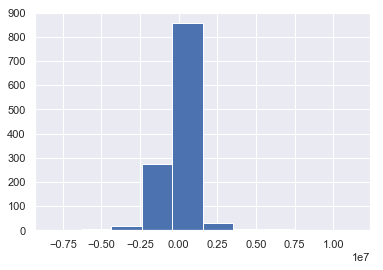

Residual mean is 23364.16795658239 +/- 2473291.894724201


In [34]:
from sklearn.model_selection import train_test_split

# Select independent variables picked from RFE with Ridge as estimator
X = product_ml_df[prod_ridge_variables].values
y = product_ml_df.Purchase.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1001)

#standarize data
scaler = StandardScaler().fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

# Ridge regression on training set
rr = Ridge(random_state=1001)
rr.fit(X_train_std, y_train)
score = rr.score(X_train_std, y_train)
print("Ridge training score: {}".format(score))

# Ridge regression on test set  
score = rr.score(X_test_std,y_test)
print("Ridge test score: {}".format(score))

# cross validation
from sklearn.model_selection import cross_val_score

cvs = cross_val_score(rr, X_test_std, y_test, cv=3)
print("Cross Val Score mean is {} +/- {}".format(np.mean(cvs),
                                                np.std(cvs)*2))

rr_with_ridge = np.mean(cvs)

# histogram of residuals 
y_pred = rr.predict(X_test_std)
residuals = y_test-y_pred

#graph
plt.hist(residuals)
plt.show()

print("Residual mean is {} +/- {}".format(np.mean(residuals),
                                                np.std(residuals)*2))

Our average score is 70% using the ridge variables. This is not accurate and could not be used within our company. Let's see if accuracy will increase or decrease with using variables selected from RFE-Random Forest Regression.

Ridge training score: 0.7877575583898422
Ridge test score: 0.7679307500228055
Cross Val Score mean is 0.7592302262729165 +/- 0.018278855489797782


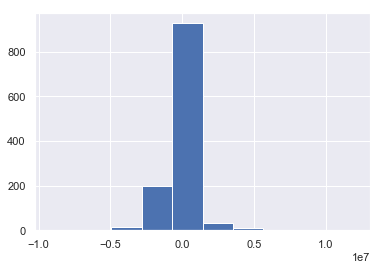

Residual mean is 10729.706496167033 +/- 2625210.3796748295


In [35]:
# Select independent variables picked from RFE with Random Forest as estimator
X = product_ml_df[prod_RFR_variables].values
y = product_ml_df.Purchase.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1001)

# standarize data
scaler = StandardScaler().fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

# Ridge regression on training set
rr = Ridge(random_state=1001)
rr.fit(X_train_std, y_train)
score = rr.score(X_train_std, y_train)
print("Ridge training score: {}".format(score))

# Ridge regression on test set  
score = rr.score(X_test_std,y_test)
print("Ridge test score: {}".format(score))

# cross validation
from sklearn.model_selection import cross_val_score

cvs = cross_val_score(rr, X_test_std, y_test, cv=3)
print("Cross Val Score mean is {} +/- {}".format(np.mean(cvs),
                                                np.std(cvs)*2))

rr_with_RFR = np.mean(cvs)

# histogram of residuals 
y_pred = rr.predict(X_test_std)
residuals = y_test - y_pred

#graph
plt.hist(residuals)
plt.show()

print("Residual mean is {} +/- {}".format(np.mean(residuals),
                                                np.std(residuals)*2))

When using the variables selected from RFE-Random Forest Regression, the Ridge Regression model increased by 6%. This is much better, but still could not be used in our business. Therefore, we will optimize the Ridge model using the variables selected from RFE with RFR. Hopefully we will be able to increase accuracy above 80%. 

Let's optimize the following variables with GridSearch CV:
- alpha
- fit intercept
- solver 

In [36]:
# Select independent variables picked from RFE with Ridge as estimator
X = product_ml_df[prod_RFR_variables].values
y = product_ml_df.Purchase.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1001)

#standarize data
scaler = StandardScaler().fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)


#Fine-tuning parameters using GridSearchCV
from sklearn.model_selection import GridSearchCV

tuned_parameters = {'alpha':[10.0,50.0,100.0,200.0], 
                    'fit_intercept': [True, False],
                    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
                    'random_state':[1001]}

reg = GridSearchCV(Ridge(), tuned_parameters, cv=3)
reg.fit(X_train_std, y_train)

reg.best_params_

{'alpha': 10.0, 'fit_intercept': True, 'random_state': 1001, 'solver': 'lsqr'}

Now that we have the best parameters to use, lets use them to retrain the model and increase the accuracy. 

In [37]:
# Select independent variables picked from RFE with Ridge as estimator
X = product_ml_df[prod_ridge_variables].values
y = product_ml_df.Purchase.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1001)

#standarize data
scaler = StandardScaler().fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)


# Random Forest Regression 
ridge = Ridge(**reg.best_params_)
ridge.fit(X_train_std, y_train)

#training set
score = ridge.score(X_train_std, y_train)
print("RandomForest training score: {}".format(score))

#test set       
score = ridge.score(X_test_std,y_test)
print("RandomForest test score: {}".format(score))

# cross validation
cvs = cross_val_score(ridge, X_test_std, y_test, cv=3)
print("Cross Val Score mean is {} +/- {}".format(np.mean(cvs),
                                                np.std(cvs)*2))

ridge_mean = np.mean(cvs)

RandomForest training score: 0.8197915733967293
RandomForest test score: 0.7941985343734126
Cross Val Score mean is 0.7494240109178539 +/- 0.08268856397920167


Looks like the model is slightly less accurate after optimization. This may have helped to decrease overfitting, however, we are still not able to use the model within our company since the accuracy is below 80%. Now let's move on to Random Forest Regression. 

### Random Forest Regression

First, let's train a Random Forest Regression model using the variables selected from RFE-Ridge.

RandomForest training score: 0.9734995247670923
RandomForest test score: 0.8611403871491943
Cross Val Score mean is 0.8417651600523407 +/- 0.02016010275439546


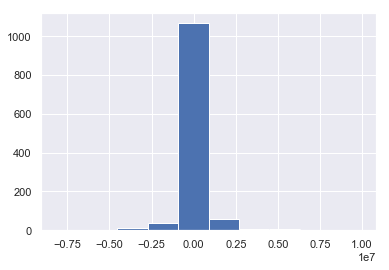

Residual mean is 13249.204159698991 +/- 2030583.3562566864


In [38]:
# Select independent variables picked from RFE with Ridge as estimator
X = product_ml_df[prod_ridge_variables].values
y = product_ml_df.Purchase.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1001)

#standarize data
scaler = StandardScaler().fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

# Random Forest Regression 
RFR = RandomForestRegressor(random_state=1001)
RFR.fit(X_train_std, y_train)

#training set
score = RFR.score(X_train_std, y_train)
print("RandomForest training score: {}".format(score))

#test set       
score = RFR.score(X_test_std,y_test)
print("RandomForest test score: {}".format(score))

# cross validation
cvs = cross_val_score(RFR, X_test_std, y_test, cv=3)
print("Cross Val Score mean is {} +/- {}".format(np.mean(cvs),
                                                np.std(cvs)*2))

rfr_with_ridge = np.mean(cvs)

# residuals 
y_pred = RFR.predict(X_test_std)

residuals = y_test - y_pred

plt.hist(residuals)
plt.show()

print("Residual mean is {} +/- {}".format(np.mean(residuals),
                                                np.std(residuals)*2))

So far, the random Forest model is performing much better than the ridge model (by almost 10%!). This model can be used in our company, but let's see if the accuracy will increase once we use the variables selected from RFE-Random Forest Regression. 

RandomForest training score: 0.9807307601311975
RandomForest test score: 0.885105875921685
Cross Val Score mean is 0.867012792177809 +/- 0.025580894340358287


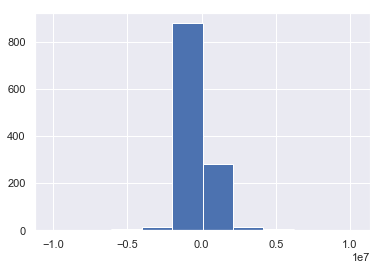

Residual mean is -6482.004632518181 +/- 1847174.9754704712


In [39]:
# Select independent variables picked from RFE with Random Forest as estimator
X = product_ml_df[prod_RFR_variables].values
y = product_ml_df.Purchase.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1001)

#standarize data
scaler = StandardScaler().fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

# Random Forest Regression 
RFR = RandomForestRegressor(random_state=1001)
RFR.fit(X_train_std, y_train)

#training set
score = RFR.score(X_train_std, y_train)
print("RandomForest training score: {}".format(score))

#test set       
score = RFR.score(X_test_std,y_test)
print("RandomForest test score: {}".format(score))

# cross validation
cvs = cross_val_score(RFR, X_test_std, y_test, cv=3)
print("Cross Val Score mean is {} +/- {}".format(np.mean(cvs),
                                                np.std(cvs)*2))

rfr_with_rfr=np.mean(cvs)

# residuals 
y_pred = RFR.predict(X_test_std)

residuals = y_test-y_pred

plt.hist(residuals)
plt.show()

print("Residual mean is {} +/- {}".format(np.mean(residuals),
                                                np.std(residuals)*2))

When comparing the variables selected during the RFE process (Ridge vs. Random Forest), variables selected using Random Forest as the estimator performed much better (2%). When comparing the Ridge Model with Random Forest, Random Forest is more accurate. Let's optimize the Random Forest Model to see if we can increase accuracy. 

In [40]:
# Select independent variables picked from RFE with RandomForest as estimator
X = product_ml_df[prod_RFR_variables].values
y = product_ml_df.Purchase.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1001)

#standarize data
scaler = StandardScaler().fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)


#Fine-tuning parameters using GridSearchCV
from sklearn.model_selection import GridSearchCV

tuned_parameters = {'n_estimators':[50,100,200],                    
                    'criterion': ['mse', 'mae'],
                    'random_state':[1001]}

#Note, removing CV due to time constriant 
reg = GridSearchCV(RandomForestRegressor(), tuned_parameters, cv=3)
reg.fit(X_train_std, y_train)

reg.best_params_

{'criterion': 'mae', 'n_estimators': 200, 'random_state': 1001}

Now that we have the best parameters to use, lets use them to retrain the model and increase the accuracy. 

In [41]:
# Select independent variables picked from RFE with RandomForest as estimator
X = product_ml_df[prod_RFR_variables].values
y = product_ml_df.Purchase.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1001)

#standarize data
scaler = StandardScaler().fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)


# Random Forest Regression 
RFR = RandomForestRegressor(**reg.best_params_)
RFR.fit(X_train_std, y_train)

#training set
score = RFR.score(X_train_std, y_train)
print("RandomForest training score: {}".format(score))

#test set       
score = RFR.score(X_test_std,y_test)
print("RandomForest test score: {}".format(score))

# cross validation
cvs = cross_val_score(RFR, X_test_std, y_test, cv=3)
print("Cross Val Score mean is {} +/- {}".format(np.mean(cvs),
                                                np.std(cvs)*2))

RFR_mean = np.mean(cvs)

RandomForest training score: 0.9871882921485109
RandomForest test score: 0.9156982202477428
Cross Val Score mean is 0.8890890568155668 +/- 0.025162125444629008


Optimizing the model help increase the accuracy by 2%. So far, Random Forest Regression is the top performing model, let's look to see if Gradient Boosting will be better. 

### Gradient Boosting Regressor 

We will first train the Gradient Boosting Model using variables selected from RFE-Ridge

Gradient Boosting training score: 0.9777013054324745
Gradient Boosting test score: 0.9075729766790605
Cross Val Score mean is 0.902839997048456 +/- 0.05517574508202631


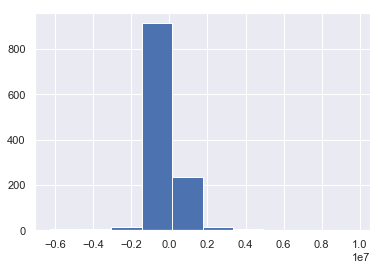

Residual mean is 29895.462996630915 +/- 1655717.7978415268


In [42]:
# Select independent variables picked from RFE with Ridge as estimator
X = product_ml_df[prod_ridge_variables].values
y = product_ml_df.Purchase.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1001)

# standarize data
scaler = StandardScaler().fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

# Gradient Boosting Regressor
GBR = GradientBoostingRegressor(random_state=1001)
GBR.fit(X_train_std, y_train)
GBR.score(X_train_std, y_train)

# training set
score = GBR.score(X_train_std, y_train)
print("Gradient Boosting training score: {}".format(score))

# test set       
score = GBR.score(X_test_std,y_test)
print("Gradient Boosting test score: {}".format(score))

# cross validation
cvs = cross_val_score(GBR, X_test_std, y_test, cv=3)
print("Cross Val Score mean is {} +/- {}".format(np.mean(cvs),
                                                np.std(cvs)*2))

gbr_with_ridge = np.mean(cvs)

# residuals 
y_pred = GBR.predict(X_test_std)
residuals = y_test-y_pred
plt.hist(residuals)
plt.show()
print("Residual mean is {} +/- {}".format(np.mean(residuals),
                                                np.std(residuals)*2))

Without optimizing, this model is the best out of the three so far, as the accuracy is 90%. Let's see if the accuracy will increase using variables selected from RFE-Random Forest

Gradient Boosting training score: 0.981641250128977
Gradient Boosting test score: 0.9290925785981481
Cross Val Score mean is 0.920724727180962 +/- 0.02966689018173716


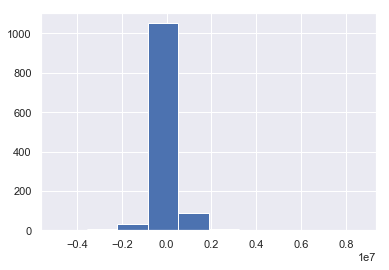

Residual mean is 32217.91993166641 +/- 1449729.9595194566


In [43]:
# Select independent variables picked from RFE with Random Forest as estimator
X = product_ml_df[prod_RFR_variables].values
y = product_ml_df.Purchase.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1001)

# standarize data
scaler = StandardScaler().fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

# Gradient Boosting Regressor
GBR = GradientBoostingRegressor(random_state=1001)
GBR.fit(X_train_std, y_train)
GBR.score(X_train_std, y_train)

# training set
score = GBR.score(X_train_std, y_train)
print("Gradient Boosting training score: {}".format(score))

# test set       
score = GBR.score(X_test_std,y_test)
print("Gradient Boosting test score: {}".format(score))

# cross validation
cvs = cross_val_score(GBR, X_test_std, y_test, cv=3)
print("Cross Val Score mean is {} +/- {}".format(np.mean(cvs),
                                                np.std(cvs)*2))

gbr_with_rfr = np.mean(cvs)

# residuals 
y_pred = GBR.predict(X_test_std)
residuals = y_test-y_pred
plt.hist(residuals)
plt.show()
print("Residual mean is {} +/- {}".format(np.mean(residuals),
                                                np.std(residuals)*2))

The model performs better with the variables selected from RFE-Random Forest. I will now try to increase the accuracy by optimizing the model.

In [44]:
# Select independent variables picked from RFE with Random Forest as estimator
X = product_ml_df[prod_RFR_variables].values
y = product_ml_df.Purchase.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1001)

#standarize data
scaler = StandardScaler().fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

#Fine-tuning parameters using GridSearchCV
from sklearn.model_selection import GridSearchCV

tuned_parameters = {'loss':['ls','lad'],
                   'n_estimators': [100,200],
                   'random_state':[1001]}

reg = GridSearchCV(GradientBoostingRegressor(), tuned_parameters, cv=3)
reg.fit(X_train_std, y_train)

reg.best_params_

{'loss': 'ls', 'n_estimators': 200, 'random_state': 1001}

Now that we have the best parameters to use, lets use them to retrain the model and increase the accuracy. 

In [45]:
# Select independent variables picked from RFE with Random Forest as estimator
X = product_ml_df[prod_RFR_variables].values
y = product_ml_df.Purchase.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1001)

#standarize data
scaler = StandardScaler().fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

GBR = GradientBoostingRegressor(**reg.best_params_)
GBR.fit(X_train_std, y_train)

#training set
score = GBR.score(X_train_std, y_train)
print("Ridge after GridSearch training score: {}".format(score))

#test set       
score = GBR.score(X_test_std,y_test)
print("Ridge after GridSearch test score: {}".format(score))

# cross validation
cvs = cross_val_score(GBR, X_test_std, y_test, cv=3)
print("Cross Val Score mean is {} +/- {}".format(np.mean(cvs),
                                                np.std(cvs)*2))

GBR_mean = np.mean(cvs)

Ridge after GridSearch training score: 0.9909521137489562
Ridge after GridSearch test score: 0.9367569966890561
Cross Val Score mean is 0.9255402050045429 +/- 0.028241442190987433


Optimizing the model help increase the accuracy by 1%. Gradient Boosting was the best performing model, let's take a look at a summary chart of each models performance.

#### Summary Chart 

In [46]:
ridge = np.array([rr_with_ridge, rfr_with_ridge, gbr_with_ridge]).reshape(3,1)
rfr = np.array([rr_with_RFR, rfr_with_rfr, gbr_with_rfr]).reshape(3,1)
mean = np.array([ridge_mean, RFR_mean, GBR_mean]).reshape(3,1)

summary = pd.DataFrame(ridge, index=['Ridge','RandomForest','GradientBoost'],columns=['Ridge_selection'])
summary['RandomForest_Selection']=rfr
summary['Optimized_model']=mean

summary

,Ridge_selection,RandomForest_Selection,Optimized_model
Ridge,0.697646,0.759230,0.749424
RandomForest,0.841765,0.867013,0.889089
GradientBoost,0.902840,0.920725,0.925540


In regards to feature selection with RFE, it looks like its best to use Random Forest Regression as the estimator, as it out performed Ridge. The best model to use to predict product sales is Gradient Boosting. After optimizing, the Gradient Boosting model scored 93% (rounded up), which is excellent. Since this model could help to predict product sales, we could use it to predict stock/inventory for each product, which would help to lower the amount of merchandise we will have remaining in stock after Black Friday. 

Please note that Gradient Boosting uses decision trees. This mean that it is essentially a "black box" model, and would be very hard to explain to our business leaders. However, it is a great model use as it is robust and very accurate. 

Let's take a look at variable importance according to the Gradient Boosting Model

#### Feature Importance:

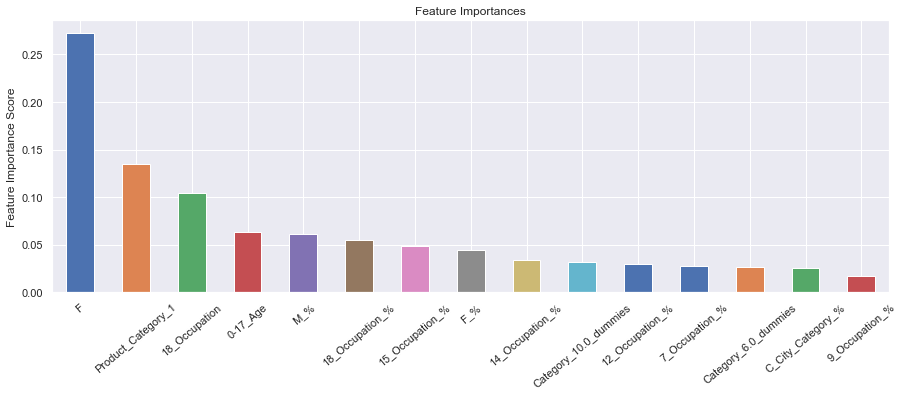

In [47]:
# Plotting Feature Importances from Gradient Boosting Classifier
feat_imp = pd.Series(GBR.feature_importances_, prod_RFR_variables).sort_values(ascending=False).head(15)
plt.figure(figsize=(15,5))
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')
plt.xticks(rotation=40)
plt.show()

This is surprising. The most important feature is how many females bought the product, follow by rather or not the product is within product category 1. Since this is a gradient boosting model that uses many decision trees, we may not be able to put much stock into feature importance. However, let's look at top three variables to see how they vary per product:

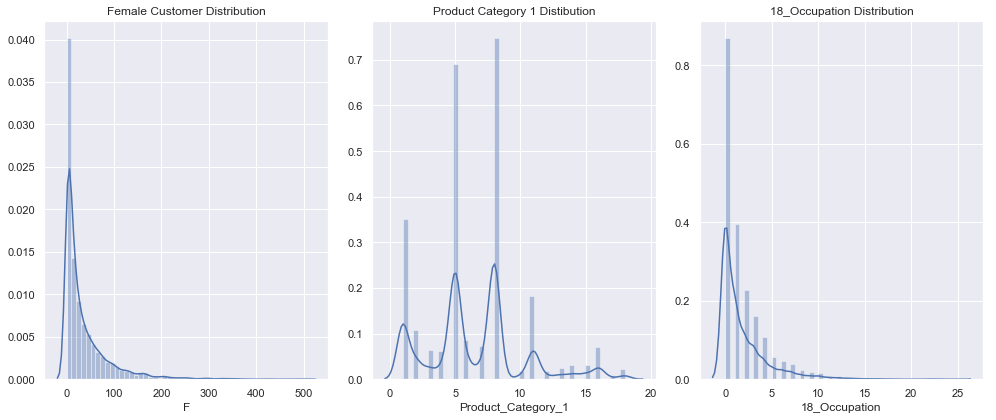

In [48]:
# Top 3 categories 
fig, axs = plt.subplots(ncols=3, figsize=(14,6))
sns.distplot(product_ml_df['F'], ax=axs[0])
axs[0].set_title('Female Customer Distribution')
sns.distplot(product_ml_df['Product_Category_1'], ax=axs[1])
axs[1].set_title('Product Category 1 Distibution')
sns.distplot(product_ml_df['18_Occupation'], ax=axs[2])
axs[2].set_title('18_Occupation Distribution')
plt.tight_layout()

When looking at the top three category distributions, we can take away three insights:
1. The majority of products have less than 100 female customers. However, for those that have higher than 100 customers must sell well, which helps the model predict the total sales of a product
2. There are certain product categories that sell more than others. Knowing this, the model puts more weight on a product's category to help predict it's sales.
3. The majority of products are not bought by people within occupation group 18. However, the products that are heavily bought by people within group 18 must sell well, which helps the model predict product sales. 

The most important variable for our supply chain team is Product Category 1. Knowing that certain product categories will sell more than others, the supply chain team can prepare and ensure that we have enough products within thoses categories in stock and ready to sell. This way, we will maximize our profits and minimize our expenses. 

Now let's look into predicting cutomer spend. 

## Predict Customer Spend

### Ridge Regression
First let's train a ridge model using variables selected during RFE using Ridge as the estimator.  

Ridge training score: 0.9743252104126149
Ridge test score: 0.9727589191196584
Cross Val Score mean is 0.9716028700643292 +/- 0.008855427442114715


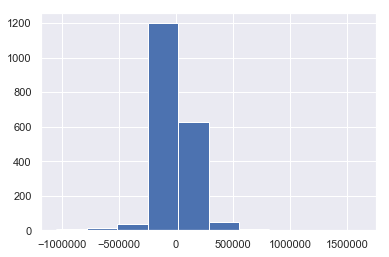

Residual mean is 867.7547323342616 +/- 303590.2399118385


In [49]:
from sklearn.linear_model import Ridge

# create test v training set 
X = user_df[user_ridge_variables].values
y = user_df.Purchase.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1001)

#standarize data
scaler = StandardScaler().fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

# Ridge Regression
rr_1 = Ridge(random_state=1001)
rr_1.fit(X_train_std, y_train)

# Ridge regression on training set 
score = rr_1.score(X_train_std, y_train)
print("Ridge training score: {}".format(score))

# Ridge regression on test set  
score = rr_1.score(X_test_std,y_test)
print("Ridge test score: {}".format(score))

# cross validation
from sklearn.model_selection import cross_val_score

cvs = cross_val_score(rr_1, X_test_std, y_test, cv=3)
print("Cross Val Score mean is {} +/- {}".format(np.mean(cvs),
                                                np.std(cvs)*2))
rr_with_ridge_1 = np.mean(cvs)

# histogram of residuals 
y_pred = rr_1.predict(X_test_std)
residuals = y_test-y_pred

#graph
plt.hist(residuals)
plt.show()

print("Residual mean is {} +/- {}".format(np.mean(residuals),
                                                np.std(residuals)*2))

Our average score is 97% using the ridge variables, which is very accurate. Let's see if accuracy will increase or decrease with using variables selected from RFE-Random Forest Regression.

Ridge training score: 0.9714845049848999
Ridge test score: 0.9708863893004647
Cross Val Score mean is 0.9707456420995407 +/- 0.009345928863879804


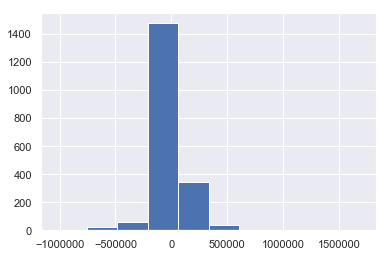

Residual mean is 1177.986070676377 +/- 313847.3982599114


In [50]:
# create test v training set 
X = user_df[user_RFR_variables].values
y = user_df.Purchase.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1001)

#standarize data
scaler = StandardScaler().fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

# Ridge Regression
rr_1 = Ridge(random_state=1001)
rr_1.fit(X_train_std, y_train)

# Ridge regression on training set 
score = rr_1.score(X_train_std, y_train)
print("Ridge training score: {}".format(score))

# Ridge regression on test set  
score = rr_1.score(X_test_std,y_test)
print("Ridge test score: {}".format(score))

# cross validation
from sklearn.model_selection import cross_val_score

cvs = cross_val_score(rr_1, X_test_std, y_test, cv=3)
print("Cross Val Score mean is {} +/- {}".format(np.mean(cvs),
                                                np.std(cvs)*2))
rr_with_RFR_1 = np.mean(cvs)

# histogram of residuals 
y_pred = rr_1.predict(X_test_std)
residuals = y_test-y_pred

#graph
plt.hist(residuals)
plt.show()

print("Residual mean is {} +/- {}".format(np.mean(residuals),
                                                np.std(residuals)*2))

Wow, variables selected with Ridge performs only slighty better when compared to variables selected by Random Forest. Let's see if this will be the same case for Random Forest Regression. Prior to training Random Forest, let's optimize the ridge model. 

In [51]:
# create test v training set 
X = user_df[user_ridge_variables].values
y = user_df.Purchase.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1001)

#standarize data
scaler = StandardScaler().fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

#standarize data
scaler = StandardScaler().fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)


#Fine-tuning parameters using GridSearchCV
from sklearn.model_selection import GridSearchCV

tuned_parameters = {'alpha':[10.0,50.0,100.0,200.0], 
                    'fit_intercept': [True, False],
                    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
                    'random_state': [1001]}

reg = GridSearchCV(Ridge(), tuned_parameters, cv=3)
reg.fit(X_train_std, y_train)

reg.best_params_

{'alpha': 10.0, 'fit_intercept': True, 'random_state': 1001, 'solver': 'auto'}

In [52]:
# create test v training set 
X = user_df[user_ridge_variables].values
y = user_df.Purchase.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1001)

#standarize data
scaler = StandardScaler().fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

# Random Forest Regression 
Ridge = Ridge(**reg.best_params_)
Ridge.fit(X_train_std, y_train)

#training set
score = Ridge.score(X_train_std, y_train)
print("RandomForest training score: {}".format(score))

#test set       
score = Ridge.score(X_test_std,y_test)
print("RandomForest test score: {}".format(score))

# cross validation
cvs = cross_val_score(Ridge, X_test_std, y_test, cv=3)
print("Cross Val Score mean is {} +/- {}".format(np.mean(cvs),
                                                np.std(cvs)*2))

ridge_mean_1 = np.mean(cvs)

RandomForest training score: 0.9743187681452476
RandomForest test score: 0.972794884109626
Cross Val Score mean is 0.9716496731875939 +/- 0.008746990883966669


As expected, optimizing slightly incresed the accuracy of the ridge model, as the model accuracy was already high. 

This model could be used in our company. Let's see if Random Forest Regression will perform better. 

### Random Forest Regression
First, let's train a Random Forest Regression model using the variables selected from RFE-Ridge.

RandomForest training score: 0.9917485564225305
RandomForest test score: 0.962182349198264
Cross Val Score mean is 0.9501773846296665 +/- 0.02273387309469834


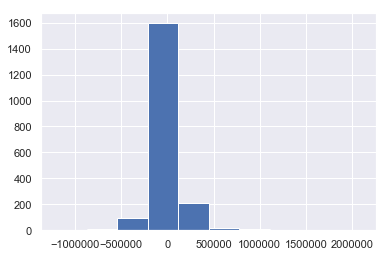

Residual mean is 5177.416401028278 +/- 357559.21013010247


In [53]:
# create test v training set 
X = user_df[user_ridge_variables].values
y = user_df.Purchase.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1001)

#standarize data
scaler = StandardScaler().fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

# Random Forest Regression 
RFR_1 = RandomForestRegressor(random_state=1001)
RFR_1.fit(X_train_std, y_train)

#training set
score = RFR_1.score(X_train_std, y_train)
print("RandomForest training score: {}".format(score))

#test set       
score = RFR_1.score(X_test_std,y_test)
print("RandomForest test score: {}".format(score))

# cross validation
cvs = cross_val_score(RFR_1, X_test_std, y_test, cv=3)
print("Cross Val Score mean is {} +/- {}".format(np.mean(cvs),
                                                np.std(cvs)*2))

rfr_with_ridge_1 = np.mean(cvs)

# residuals 
y_pred = RFR_1.predict(X_test_std)
residuals = y_test - y_pred
plt.hist(residuals)
plt.show()
print("Residual mean is {} +/- {}".format(np.mean(residuals),
                                                np.std(residuals)*2))

This produced an accuracy of 95%, only less accurate by 2% when compared to Ridge model. Let's see if the accuaracy will increase when using variables selected with Random Forest Regression. 

RandomForest training score: 0.9904529003198357
RandomForest test score: 0.9615661802790136
Cross Val Score mean is 0.9510258795166749 +/- 0.019614565183551032


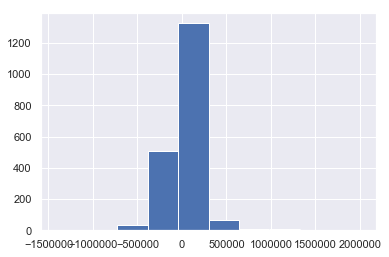

Residual mean is 5364.320107889254 +/- 360451.8160644872


In [54]:
# create test v training set 
X = user_df[user_RFR_variables].values
y = user_df.Purchase.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1001)

#standarize data
scaler = StandardScaler().fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)


# Random Forest Regression 
RFR_1 = RandomForestRegressor(random_state=1001)
RFR_1.fit(X_train_std, y_train)

#training set
score = RFR_1.score(X_train_std, y_train)
print("RandomForest training score: {}".format(score))

#test set       
score = RFR_1.score(X_test_std,y_test)
print("RandomForest test score: {}".format(score))

# cross validation
cvs = cross_val_score(RFR_1, X_test_std, y_test, cv=3)
print("Cross Val Score mean is {} +/- {}".format(np.mean(cvs),
                                                np.std(cvs)*2))

rfr_with_rfr_1 = np.mean(cvs)

# residuals 
y_pred = RFR_1.predict(X_test_std)
residuals = y_test - y_pred
plt.hist(residuals)
plt.show()
print("Residual mean is {} +/- {}".format(np.mean(residuals),
                                                np.std(residuals)*2))

The model is slightly better when using RFE-Random Forest variables. Let's optimize the model to see if we can increase the accuracy. 

In [55]:
# create test v training set 
X = user_df[user_RFR_variables].values
y = user_df.Purchase.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1001)

#standarize data
scaler = StandardScaler().fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)


#Fine-tuning parameters using GridSearchCV
from sklearn.model_selection import GridSearchCV

tuned_parameters = {'n_estimators':[50,100,200],                    
                    'criterion': ['mse', 'mae'],
                    'random_state':[1001]}

#Note, removing CV due to time constriant 
reg = GridSearchCV(RandomForestRegressor(), tuned_parameters, cv=3)
reg.fit(X_train_std, y_train)

reg.best_params_

{'criterion': 'mse', 'n_estimators': 200, 'random_state': 1001}

In [56]:
# create test v training set 
X = user_df[user_RFR_variables].values
y = user_df.Purchase.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1001)

#standarize data
scaler = StandardScaler().fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)


# Random Forest Regression 
RFR = RandomForestRegressor(**reg.best_params_)
RFR.fit(X_train_std, y_train)

#training set
score = RFR.score(X_train_std, y_train)
print("RandomForest training score: {}".format(score))

#test set       
score = RFR.score(X_test_std,y_test)
print("RandomForest test score: {}".format(score))

# cross validation
cvs = cross_val_score(RFR, X_test_std, y_test, cv=3)
print("Cross Val Score mean is {} +/- {}".format(np.mean(cvs),
                                                np.std(cvs)*2))

RFR_mean_1 = np.mean(cvs)

RandomForest training score: 0.9945722379832755
RandomForest test score: 0.9661298961231621
Cross Val Score mean is 0.9577914095322665 +/- 0.018742573373697426


After optimizing, we were able to increase the percentage by only 0.06%. For now, the Ridge Model is the best performing model. 

Now let's take a look at Gradient Boosting Regression Model. 

### Gradient Boosting Regressor 

Gradient training score: 0.985651506788267
Gradient test score: 0.9623002280585932
Cross Val Score mean is 0.9595490148066683 +/- 0.012010321806358065


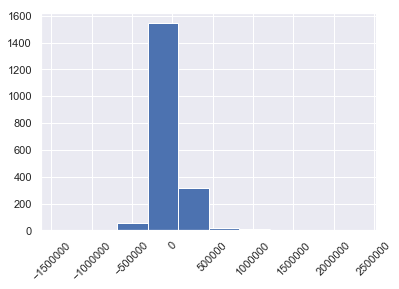

Residual mean is 312.67264469217673 +/- 357150.63738665404


In [57]:
# create test v training set 
X = user_df[user_ridge_variables].values
y = user_df.Purchase.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1001)

#standarize data
scaler = StandardScaler().fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

# Gradient Boosting Regressor
GBR_1 = GradientBoostingRegressor(random_state=1001)
GBR_1.fit(X_train_std, y_train)

#training set
score = GBR_1.score(X_train_std, y_train)
print("Gradient training score: {}".format(score))

#test set       
score = GBR_1.score(X_test_std,y_test)
print("Gradient test score: {}".format(score))

# cross validation
cvs = cross_val_score(GBR_1, X_test_std, y_test, cv=3)
print("Cross Val Score mean is {} +/- {}".format(np.mean(cvs),
                                                np.std(cvs)*2))

gbr_with_ridge_1 = np.mean(cvs)

# residuals 
y_pred = GBR_1.predict(X_test_std)
residuals = y_test - y_pred
plt.hist(residuals)
plt.xticks(rotation=45)
plt.show()
print("Residual mean is {} +/- {}".format(np.mean(residuals),
                                                np.std(residuals)*2))

So far, this model performs better than our Random Forest Model, but worse than the Ridge Regression Model. Let's see if it will improve with us using variables selected from RFE-Random Forest. 

Gradient training score: 0.9836288180656997
Gradient test score: 0.9631205666969433
Cross Val Score mean is 0.9625415506244508 +/- 0.009127161129063213


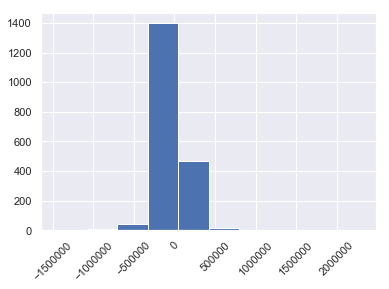

Residual mean is 383.2750956718119 +/- 353243.21652298974


In [58]:
# create test v training set 
X = user_df[user_RFR_variables].values
y = user_df.Purchase.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1001)

#standarize data
scaler = StandardScaler().fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

# Gradient Boosting Regressor
GBR_1 = GradientBoostingRegressor(random_state=1001)
GBR_1.fit(X_train_std, y_train)

#training set
score = GBR_1.score(X_train_std, y_train)
print("Gradient training score: {}".format(score))

#test set       
score = GBR_1.score(X_test_std,y_test)
print("Gradient test score: {}".format(score))

# cross validation
cvs = cross_val_score(GBR_1, X_test_std, y_test, cv=3)
print("Cross Val Score mean is {} +/- {}".format(np.mean(cvs),
                                                np.std(cvs)*2))

gbr_with_RFR_1 = np.mean(cvs)

# residuals 
y_pred = GBR_1.predict(X_test_std)
residuals = y_test - y_pred
plt.hist(residuals)
plt.xticks(rotation=45)
plt.show()
print("Residual mean is {} +/- {}".format(np.mean(residuals),
                                                np.std(residuals)*2))

The model increased slightly, but it still is not as accurate as the Ridge Model. Let's see we can optimize it to increase accuracy. 

In [59]:
# create test v training set 
X = user_df[user_RFR_variables].values
y = user_df.Purchase.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1001)

#standarize data
scaler = StandardScaler().fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

#Fine-tuning parameters using GridSearchCV
from sklearn.model_selection import GridSearchCV

tuned_parameters = {'loss':['huber','quantile'],
                    'alpha':[0.9],
                    'max_features':['auto','log2'],
                    'n_estimators': [200],
                    'random_state':[1001]}

reg = GridSearchCV(GradientBoostingRegressor(), tuned_parameters, cv=3)
reg.fit(X_train_std, y_train)

reg.best_params_

{'alpha': 0.9,
 'loss': 'huber',
 'max_features': 'log2',
 'n_estimators': 200,
 'random_state': 1001}

In [60]:
# create test v training set 
X = user_df[user_RFR_variables].values
y = user_df.Purchase.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1001)

#standarize data
scaler = StandardScaler().fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

GBR = GradientBoostingRegressor(**reg.best_params_)
GBR.fit(X_train_std, y_train)

#training set
score = GBR.score(X_train_std, y_train)
print("Ridge after GridSearch training score: {}".format(score))

#test set       
score = GBR.score(X_test_std,y_test)
print("Ridge after GridSearch test score: {}".format(score))

# cross validation
cvs = cross_val_score(GBR, X_test_std, y_test, cv=3)
print("Cross Val Score mean is {} +/- {}".format(np.mean(cvs),
                                                np.std(cvs)*2))

GBR_mean_1 = np.mean(cvs)

Ridge after GridSearch training score: 0.9842469620373937
Ridge after GridSearch test score: 0.9637350842835664
Cross Val Score mean is 0.9638907179616732 +/- 0.0033046714073774056


After oprtimizing, we were able to increase the accuracy by 0.1%. Let's look at the summary table of the models' accuracy.

#### Summary Chart 

In [61]:
ridge = np.array([rr_with_ridge_1, rfr_with_ridge_1, gbr_with_ridge_1]).reshape(3,1)
rfr = np.array([rr_with_RFR_1, rfr_with_rfr_1, gbr_with_RFR_1]).reshape(3,1)
mean = np.array([ridge_mean_1, RFR_mean_1, GBR_mean_1]).reshape(3,1)

summary = pd.DataFrame(ridge, index=['Ridge','RandomForest','GradientBoost'],columns=['Ridge_selection'])
summary['RandomForest_Selection']=rfr
summary['Optimized_model']=mean

summary

,Ridge_selection,RandomForest_Selection,Optimized_model
Ridge,0.971603,0.970746,0.971650
RandomForest,0.950177,0.951026,0.957791
GradientBoost,0.959549,0.962542,0.963891


Similar to when we predicted product sales, variables selected with RFE-Random Forest performed better than RFE-Ridge (exception being for the Ridge model predicting customer spend). In most cases, it seems that using Random Forest as the estimator will pick the most efficient and accurate variables. 

The Ridge model performed the best in comparison to Random Forest and Gradient Boost. After optimizing the model, the model scored at 97.2%, which is excellent.

This model would be perfect to use within our company, because its easy to explain how the independent variables affect the target variable, as apposed to an ensemble model. The company would perfer a model such as this, so that we are able to use the information from this model in other areas of the business. For an example, the Ridge model would be able to help determine which customers to target to increase marketing ROI. We could feed the model data of potential customers so that it could project how much they will spend. From there, we can determine how much money we will spend to market to each customer and increase ROI.

Let's look to see which features are important within this model:

#### Feature Importance: 

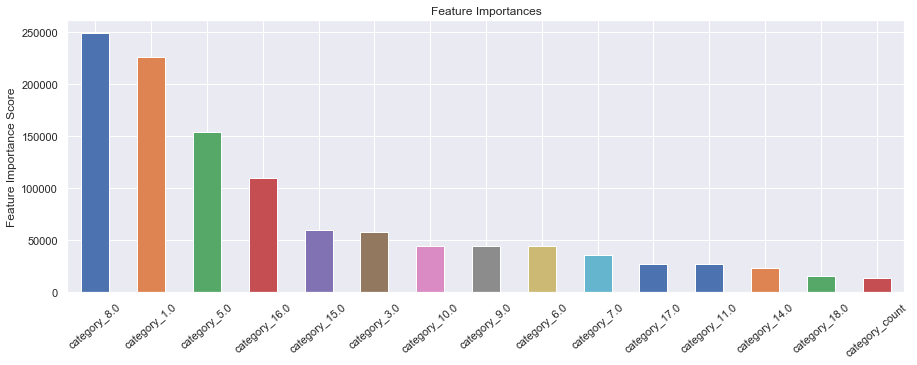

In [62]:
# Plotting Feature Importances from Gradient Boosting Classifier
feat_imp = pd.Series(Ridge.coef_, user_ridge_variables).sort_values(ascending=False).head(15)
plt.figure(figsize=(15,5))
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')
plt.xticks(rotation=40)
plt.show()

This chart is great information for our marketing team, as it conveys the most important categories in determine customer spend according to the Ridge model. There are three insights we can gain from this visual:

1. Categories 8, 1 and 5 are the top three most important independent variables. There may be a reason for this, so we'll check out the spending distribution for each category. 
2. When determining marketing spend, we should highlight customers who buy products within the reference categories. This may help to increase ROI. Please note, although the categories not listed within the visual is not important according to the Ridge Model, we still should consider marketing to the customers within those categories. 
3. The other customer demographics (such as age group, city category and gender) were not needed in order to predict customer spend. However, it would be helpful to build a model that uses the other customer demographics to predict customer spend, as it would benefit our marketing team by determining marketing ROI. 

Let's dive deeper into insight one to see if there is a reason why categories 8, 1 and 5 are most important. We'll create visuals that compare the top 3 variables against the bottom three variables (11, 14, and 18). 

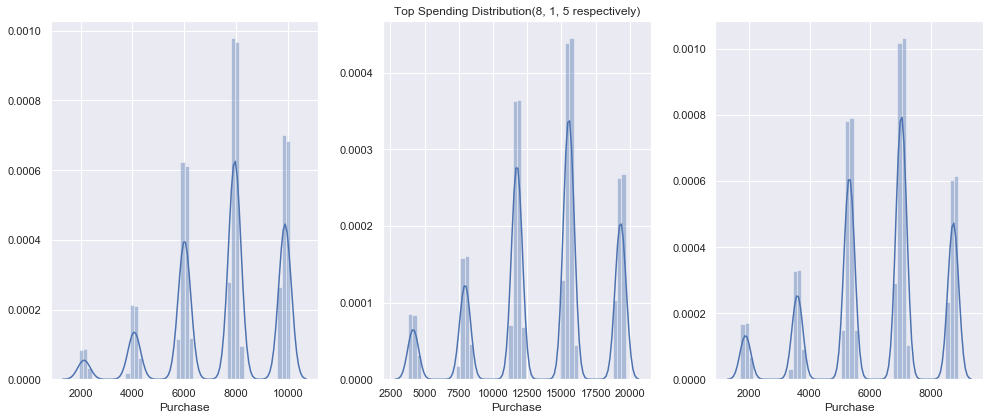

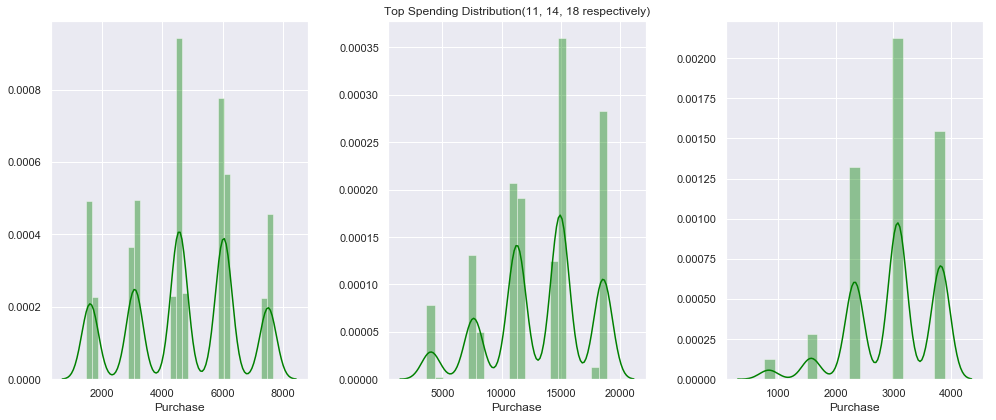

In [63]:
# Top 3 categories 
fig, axs = plt.subplots(ncols=3, figsize=(14,6))
sns.distplot(raw_df[raw_df.Product_Category_1 == 8].Purchase, ax=axs[0])
sns.distplot(raw_df[raw_df.Product_Category_1 == 1].Purchase, ax=axs[1])
axs[1].set_title('Top Spending Distribution(8, 1, 5 respectively)')
sns.distplot(raw_df[raw_df.Product_Category_1 == 5].Purchase, ax=axs[2])
plt.tight_layout()

# Bottom 3 categories 
fig, axs = plt.subplots(ncols=3, figsize=(14,6))
sns.distplot(raw_df[raw_df.Product_Category_1 == 11].Purchase, ax=axs[0], color='green')
sns.distplot(raw_df[raw_df.Product_Category_1 == 14].Purchase, ax=axs[1], color='green')
axs[1].set_title('Top Spending Distribution(11, 14, 18 respectively)')
sns.distplot(raw_df[raw_df.Product_Category_1 == 18].Purchase, ax=axs[2], color='green')
plt.tight_layout()

Although, the histogram bars look similar between both the top and bottom categories, there is still a difference between the two. When you compate the KDE lines between the top and bottom three categories, you will see that the KDE lines bottoms in-between each spending bin for the Top Spending Distibutions. This suggests that their are more people buying the products within the top 3 categories when compared to the bottom three categories. We can confirm this with a quick chart: 

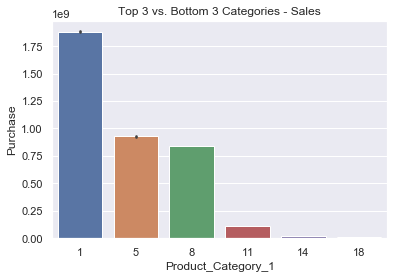

In [64]:
# Top 3 vs. Bottom 3 
sns.barplot(x = 'Product_Category_1', y = 'Purchase', 
            estimator=np.sum,
            data = raw_df[raw_df.Product_Category_1.isin([8,1,5,18,11,14])])
plt.title('Top 3 vs. Bottom 3 Categories - Sales')
plt.show()

As per the visual, the top 3 categories sales are much higher than the bottom 3. This is great insight for our marketing team, as we now know that these are our top 3 performing categories. More than likely, we will have a high marketing ROI when targeting potential customers who would like products within the top categories. Also, we have identified products that do not sell well. This may be due to lack of product awareness in those categories. If the marketing wanted to increase sales in the bottom categories, they could run an experiement to see running ads for the products would increase sales.   

# Conclusion

We are able to use our sales transaction data to predict product sales and customer spend. This in turn can help our marketing and supply chain teams increase company revenue while decreasing expenses. 

Through data exploration, we were able to determine the demographics of our target audience, which are 26-35 age group, male, non-married and have an occupation within 0, 4 or 7 occupation groups. We also realized that we have the opportunity to increase sales of customers outside of our target audience group. For our marketing team, this information is valuable, as it will help them to determine their marketing strategy and an expected ROI. 

The model we developed (Gradient Boosting Regression) for product sales scored over 90%, which means we can use it thoughout our company. With this model, we are able to predict product sales, which we can then use to predict stock levels for each product. The supply chain team can use this information to decrease the amount of stock we have left over after black friday sales, which will help to decrease expenses and increase profits. With using stock level history, we can determine how much money we will save by using this model in production. We also gained insights on which variables affect product sales. Knowing this, the marketing team can use these variables when developing their marketing strategy. The only drawback for using this model is that its very difficult to explain how each product sale is predicted, since we are using an ensemble model. Our business leaders may not like this drawback, but if we are able to show how much money we will save through using the model, it may be accepted.  

The model we developed (Ridge Regression) to predict customer spend scored over 90% as well, which is excellent. This is a great model that can be used by our marketing team to help determine marketing strategy and output. With this model, the marketing team can determine how much money we should spend on each customer group by determining the marketing ROI. This will ultimately help us to become more efficient in marketing, which will eventually increase our bottom line. We also have greater insights into which product categories lead to greater customer spend. Knowing this, our marketing team can match this information with our target audience to increase our sales dramatically. This information also helps our supply chain team, as they know which categories should have high stock levels. The only drawback to using this model is that it only gives insights into product categories, not customer demographics. To do this, we would have to develop another model that uses our customer demographic data to predict customer spend. This would be very helpful to our marketing team when determine marketing strategy. Otherwise, this model would be great to use throughout our company, and should be accepted by business leadership. 